# <center><u>Modul Data Literacy - Project: Thermal Energy Storage TES</u></center>
<center>by Pere Bohigas Boladeras & Lars Komogowski</center>

# Table of Content

I. [Motivation](#I)

1. [The Energy Turnaround may not only focus on the electricity sector](#I_1)
2. [Thermal energy storages](#I_2)
3. [Object of investigation](#I_3)
4. [Project Objective](#I_4)
  
II. [Methodology](#II)

1. [Frame the problem and look at the big picture](#II_1)
2. [Get the data](#II_2)
3. [Explore the data](#II_3)
4. [Prepare the data](#II_4)
5. [Short-list promising models](#II_5)
6. [Fine-tune the system](#II_6)
7. [Present your solution](#II_7)
  
III. [Implementation](#III)

1. [Initialization](#III_1)

    1.1. [Installation of python modules](#III_11)<br>
    1.2. [Import of python modules](#III_12)<br>
    1.3. [Data Exploration](#III_13)<br><br>
    
2. [Data preparation](#III_2)

    2.1. [Set project constants](#III_21)<br>
    2.2. [Load data](#III_22)<br>
    2.3. [Feature selection](#III_23)<br>
    2.4. [Data cleaning](#III_24)<br>
    2.5. [Feature engineering](#III_25)<br><br>
    
3. [Visualization](#III_3)

    3.1. [Data distribution](#III_31)<br>
    3.2. [Data performance](#III_32)<br>
    3.3. [Correlation between features and label](#III_33)<br><br>
    
4. [Machine Learning](#III_4)

    4.1. [Creating a Train and Test Set](#III_41)<br>
    4.2. [Setting (a) performance measure(s)](#III_42)<br>
    4.3. [Training machine learning models](#III_43)<br>
    4.4. [Final evaluation on the test set](#III_44)<br>
    4.5. [Conclusion](#III_45)

# I. Motivation <a class="anchor" id="I"></a>
---

## 1. The Energy Turnaround may not only focus on the electricity sector <a class="anchor" id="I_1"></a>
Global warming is one of the world's most important challenge mankind has to overcome. With the UN-climate conference in Paris, December 2016, 197 states signed the so-called climate agreement. This agreement has three objects:


* The states set themselves the global goal of limiting global warming to "well below" two degrees Celsius compared to the pre-industrial age, with efforts to limit it to 1,5 degrees Celsius.
* The ability to adapt to climate change is to be strengthened and is established as an equal goal alongside the reduction of greenhouse gas emissions.
* In addition, the financial flows are to be brought into line with the climate targets.


Unfortunately, on November 4th 2019, the United States of America declared to step back from their agreement. The exit will formally take place one year later. With nearly 14%, the USA is the second most pollutant state in the world, doubting the human influence on the climate. Scientifically ensured is the fact, that green house gas emissions, like CO<sub>2</sub> or methane, are warming up the earth's atmospheric temperature. The following video from NASA (with audio) illustrates the occurrence of CO<sub>2</sub> in the atmosphere during an entire year.
The largest CO<sub>2</sub> emitters in the Northern Hemisphere of the earth are clearly visible as wells as the differences between the seasons. During winter in the Northern Hemisphere, the atmosphere seems to burn until spring brings the first trees and bushes to bloom again. Furthermore, this recording illustrates very well the importance of essential ecosystems such as the South American rainforest. Unfortunately, even the rainforest is endangered by human greed.

<center><div id="videoDiv">
     <video id="video" src="./videos/NASA.mp4" width="100%" controls>
         </div></center>
<center><font color="#717D7E" >Figure 1: A year in the life of Earth's CO<sub>2</sub> (source: NASA <sup><a href="#[1]">[1]</a></sup>)</center>

Germany is facing climate change with its "Energiewende", which translates with the term energy turnaround. Thermal energy storage are increasingly important for the successful implementation of the energy turnaround. By now, the situation in Germany is as seen below in <a href="#Figure 2">Figure 2</a>. Beside the renewable share (RE share) of the power sector, the two other sectors, mobility and heat, are far from the target given by the German government. The heat sector consumes nearly half of the end energy demand and therefor requires a major effort to achieve a total carbon neutrality in 2050.

<a id="Figure 2"></a>
<img src="images/GEED.png" alt="Germand end energy demand in 2017" style="width: 300px;">
<center><font color="#717D7E" >Figure 2: German end energy demand in 2017<br>
    (source: own representation according to the data of the Bundesverband Erneuerbare Energie e.V. <a href="#[2]">[2]</a>)</center>

If we take a closer look at absolute values of end energy and the distribution among the type of end energy in <a href="#Figure 3">Figure 3</a> on the left side, it can clearly be seen, that heat consumes 54,1% and therefor even more than half of the total energy amount in Germany.
Within the heat sector, the most problematic application area is the process heat. When taking a closer look at the energy carriers prevailing in this area, only 5% of the end energy is produced by using renewables (<a href="#Figure 3">Figure 3</a> right).

<a id="Figure 3"></a>
<table><tr>
<td> <img src="images/GEED_application areas.png" alt="Drawing" style="height: 250px;"/> <td> 
<td> <img src="images/GEED_process heat.png" alt="Drawing" style="height: 250px;"/> </td>
</tr></table>
<center><font color="#717D7E" >Figure 3: left: German end-energy demand in the application areas; right: Energy carriers for process heating<br>
    (source: own representations according to the data of the Bundesministerium für Wirtschaft und Energie <a href="#[3]">[3]</a>)</center>

This situation becomes even more serious by looking at the change of RE share in process heat since 2008, like  <a href="#Figure 4">Figure 4</a> is showing. Process heat is separated in:

* __under 100 °C:__ Heat transport with warm or hot water (partially pressurized)<br>
* __100 °C to 300 °C:__ Heat transport by means of super heated steam or heat transfer oils (thermal oils)<br>
* __above 300 °C:__ blast and industrial furnaces

The share of renewable energy is not only very low in the process heat sector, but has also stagnated at around 5 % for more than a decade.

<a id="Figure 4"></a>
<img src="images/Change of RE share.png" alt="Change of RE share in process heat sector" style="width: 500px;">
<center><font color="#717D7E" >Figure 4: Change of RE share in process heat sector since 2008 (source: Bundesverband Erneuerbare Energie e.V. <a href="#[4]">[4]</a>) </center>

## 2. Thermal energy storage <a class="anchor" id="I_2"></a>
The main problems of renewable energies in the power as well as in the heat sector — not only for process heat — are its volatility, predictability and global imbalanced distribution (beside some soft factors like political incentives and resistances against the expansion of renewables). 

What batteries (primary and secondary) might cope in the power sector, so-called thermal energy storage (TES) might cope in the heat sector. There are two principal discrepancies that represent the challenges which storage in general is able to overcome.

\begin{align}
\mathrm{
    Location_{Supply} \neq Location_{Demand}\\
    Time_{Supply} \neq Time_{Demand}
}
\end{align}

Both local and time-dependent discrepancies differ of course according to the considered case, but referring to process heat, a local discrepancy can be solved by local or district heating networks (warm or hot water as well as super heated steam or thermal oils). However, time-dependent factors cannot be compensated by heating  networks or can only be compensated for a very short time. Furthermore, it is equally difficult to transport thermal energy at higher temperatures over long distances, because of:

* __Thermal losses:__ Higher temperature differences increase heat losses to the environment
* __Energy expenditure:__ High amounts of compression work (electric energy) is needed to compensate friction losses
* __Thermal stability:__ Thermal oils are only stable until 400 °C

Of course, thermal losses and thermal stability, depending on the storage material used, are also challenges for TES, but may be erased by an optimized system design. The first step in system design is to choose the right storage technology. TES are seperated in three different storage principles, as shown in <a href="#Figure 5">Figure 5</a>.

<a id="Figure 5"></a>
<img src="images/thermal_energy_storage_principles.png" alt="Thermal energy storage principles" style="width: 700px;">
<center><font color="#717D7E" >Figure 5: Thermal energy storage principles (source: own representation)</center>

The main characteristics of the storage technologies are:

* sensible: increase and decrease of storage material temperature
* latent: enthalpy of phase change (mostly solid &harr; liquid, due to lower volume expansion)
* thermochemical: sorption or reaction enthalpy

Whereas the main advantages are:

| sensible | latent | thermochemical |
|-|-|-|
| * cheap storage materials<br>* technically mature   | * high volumetric storage capacity <br>* isothermal heat release   | * high gravimetric capacity<br>* zero thermal losses  |

As <a href="#Figure 5">Figure 5</a> shows, even in between the storage technologies, a wide range of different storage materials are possible.


Industrial processes are often highly dynamic and very sensitive. Especially process steam-guided systems are designed with multiple redundancy in order to avoid any breakdowns or fluctuations. Therefore a thermal energy storage must primarily meet the requirement of being highly dynamic, which means that heat might be charged and discharged in a very short manner of time.

Many solutions prefer selecting cheap heat storage materials, such as nitrate based salts, and then compensate for the lack of (very) low thermal conductivity by designing the storage including complex heat transfer structures, mostly axially arranged fins made of aluminum alloys. These surplus structures raise of course the storage price and also the complexity of its assembly.

An alternative storage concept is recently developed at the Fraunhofer Institute for Environmental, Safety, and Energy Technology UMSICHT in Sulzbach-Rosenberg. A latent thermal energy storage using metal alloys as phase change materials (short PCM) and therefore as storage materials enable simple storage and heat exchanging designs because of their high thermal conductivity. A comparison of commercially used salts as PCM and metal alloys identified by Fraunhofer UMSICHT as PCM is shown in <a href="#Figure 6">Figure 6</a>.

<a id="Figure 6"></a>
<img src="images/thermal_conductivity.png" alt="Thermal conductivities of common salts and comparable metal alloys for the use as PCM" style="width: 500px;">
<center><font color="#717D7E" >Figure 6: Thermal conductivity of commercially used salts and comparable metal alloys for the use as PCM (source: own representation)</center>

The upper diagram shows the volumetric energy storage density in kWh per m³ on the ordinate plotted over the thermal conductivity on the abscissa of 4 salts and 4 metal alloys. Most known in thermal energy storage applications is the so-called solar salt – a mixture of 40% KNO<sub>3</sub> (potassium nitrate) and 60% NaNO<sub>4</sub> (sodium nitrate) – used in concentrated solar power plants to shift daily surpluses into night hours. What can be seen is, that the depicted salts are located in the III quadrant, which means that they have both low thermal conductivity and low volumetric energy storage densities. The latter fact is compensated by their low price compared to the shown metal alloys. These materials instead save overall storage volume because of their high densities and possess thermal conductivity values that make additional heat transfer structures unnecessary.

To understand how a PCM works, <a href="#Figure 7">Figure 7</a> shows the storage principle of latent thermal energy storage. As said before, the heat is stored in a phase change – mostly solid &harr; liquid – which means that the PCM is heated up over its phase change temperature to store the heat (melting) and cooled down under its phase change temperature to release the heat (solidification). When heat is stored or released without a phase change, the temperature of the PCM rises and falls constantly. As soon as the phase change temperature is reached (whether during heating up or cooling down) the PCM starts to melt/solidify. Its temperature stays (nearly) constant until the whole phase change is completed. Beginning from the left in <a href="#Figure 7">Figure 7</a>, the PCM is solid as the "charging" (heating up) starts. The temperature rises constantly (the gradient is determined by the specific heat capacity of the PCM used) until the PCM reaches its phase change temperature. The PCM now begins to melt. During this phase, its temperature stays (nearly because of the phase change kinetics) constant until the whole material is liquid. If this is achieved, the material's temperature begins to rise again in the liquid phase. The solidification process occurs vice versa.


<a id="Figure 7"></a>
<img src="images/latent.png" alt="Latent thermal energy storage principle" style="width: 500px;">
<center><font color="#717D7E" >Figure 7: Latent thermal energy storage principle (source: own representation)</center>

## 3. Object of investigation <a class="anchor" id="I_3"></a>

This data science project is part of the OTH mind test module "Data Literacy" and represents the exam performance to be achieved. The domain under consideration was presented in the previous chapters. The examined data in chapter III originate from a test plant with a thermal energy storage consisting of the metal alloy ZnAl6 (see <a href="#Figure 6">Figure 6</a>). The test plant was recently built in the technical area of Fraunhofer UMSICHT in Sulzbach-Rosenberg and is meant to simulate the integration of the thermal energy storage in an industrial cogeneration plant. The main purpose of the thermal energy storage is the generation of super heated steam, which shall be used as process steam for an industrial park.

A thermal energy storage has three main states:

* Charging: The thermal energy storage is heated up
* Storing: The heat is kept for a certain manner of time
* Discharging: The thermal energy storage releases the heat

In the present test plant, the main focus is on the discharging scenario, as this is the much more demanding one. All the following explanations refer directly to the flow chart in <a href="#Figure 8">Figure 8</a>. The relevant data measuring points are highlighted in red. The rest of the test plant measuring points is not important for this project.

### Charging:

The charging process defines the heating of the storage (melting). In the real application, the thermal energy storage will be heated up by using super heated steam out of a cogeneration plant (no matter if fossil fueled or regenerative).  In the test plant the storage (Speicherbehälter on the right) will be heated up by using three jacket heaters, because producing super heated steam in a technical area is too complex and not necessary for this case. The storage doesn't care how it is heated up. The jacket heaters are monitored and controlled via 7 temperature measuring points on the outer jacket surface of the storage tank (TR350 - TR356) and may also be controlled via temperature measuring points in the inside of the storage tank (TR321...TR341 - TR325...TR345).

At the end of every charging process, the whole storage was heated up to 400°C and the whole metal alloy ZnAl6 is in its liquid stage.

### Storing:

Because of the examined application, the storing process of the thermal energy storage is very short and usually takes just a few minutes. The process steam production has to be very dynamic and consequently the time between the charging and discharging is nearly not existent.

### Discharging:

With the storage being heated up to 400 °C, the heat transfer fluid being used (deionized water in the Speisewasserbehälter on the lower left side) is simultaneously heated up to 90 °C. The so-called feed water is usually heated up to temperatures nearly below its evaporation temperature according to the desired pressure stage. Because of temperature limitations of the feed water pump (Speisewasserpumpe on the lower middle), the final temperature of the feed water before it enters the storage is maintained by a flow heater (Strömungserhitzer on the lower right side). The discharging always takes place for 20 minutes.

This being said, the charging splits into the following steps:

1. Feed water is heated up to 90°C (1 bar absolute pressure)
2. Storage tank heated up to 400°C
3. Start of the feed water pump
4. The desired volume flow (FIR110) is set and regulated by the pump
5. The desired inlet temperature (4T0 and/or TR310) is set and regulated by the flow heater<br>
    &hookrightarrow; 4T0 is part of the same temperature sensor (multi point) as 4T6<br>
    &hookrightarrow; TR310 is a stand-alone temperature sensor
6. Before flowing through the storage, the desired pressure is set up via the valve NY210 (monitored by PR120 in the heating up phase and by PR210 during the discharging) and by using the bypass around the storage
7. When the desired pressure (21 to 55 bar gauge) and inlet temperature (150°C to 180°C) is reached, the discharging starts by changing the flow from bypass to storage
8. The preheated and pressurized deionized water is flowing through the storage from the bottom (pipe through the liquid metal ZnAl6)
9. The water is heated up to its evaporation temperature (21 bar &harr; 215°C ... 180°C &harr; 270°C) through the released heat of the storage
10. The water evaporates and turns into steam inside the storage
11. The steam leaves the storage (4T6) on its top and is now super heated (optimally)
12. The produced steam is flowing through the rest of the test plant, depressurized, cooled down (condensed) and fed into the feed water tank again &harr; The circle is closed

### Test plant flow chart:

<a id="Figure 8"></a>
<img src="images/flow_chart_labelled.png" alt="Labelled flow chart" style="width: 100%">
<center><font color="#717D7E" >Figure 8: Flow chart of the test plant for the examination of the thermal energy storage (source: own representation)</center> 

At this point, a "feature selection" is already taking place, because it is known that other measured data (non-circled in <a href="#Figure 8">Figure 8</a>) is not affecting the storage behavior. If all the data is kept for the machine learning algorithm(s), there would be a high loss of performance. Given that this project is part of a machine learning course, such preliminary considerations are of course particularly beneficial for the application of what has been learned, but the aspect that the data scientists working on the project have extensive domain knowledge also comes into play here.

For this project the important measuring points (= feature selection) in the data sets are:

|Sensor|Description|Unit|
|-|-|-|
|4T0|Temperature before heat storage (water)|°C|
|4T6|Temperature before heat storage (steam)|°C|
|FIR110|Flow rate before heat storage (water)|l/h|
|PR210|Pressure after heat storage (steam)|barg|
|T351|Temperature storage tank lower sector|°C|
|T353|Temperature storage tank middle sector|°C|
|T355|Temperature storage tank upper sector|°C|

<a href="#Figure 9">Figure 9</a> shows a picture of the whole test plant. The important measuring points are highlighted like in <a href="#Figure 8">Figure 8</a> The thermal energy storage is on the right (red circle) and approximately 6 meter high.
    
<a id="Figure 9"></a>
<img src="images/test_plant.png" alt="Test plant" style="width: 500px;">
<center><font color="#717D7E" >Figure 9: Test plant with highlighted measuring points and 6m high thermal energy storage (approx. 1.000kg of metal alloy)</center>    
    
### Datasets:

The dataset consists of experiments made with different parameters according to the method "Design of Experiments" (short DOE). The influencing factors are:

* Volume flow
* Inlet temperature of feed water
* Outlet pressure of produced steam

These factors are varied in different experiments:     

|Data set designation|Volume flow in l/h<br>FIR110|Inlet temperature in °C<br>4T0|Outlet pressure in barg<br>PR210|
|-|-|-|-|
|1|200|180|43|
|3|150|150|55|
|4|200|165|43|
|5|150|180|21|
|9|200|180|43|
|13|200|180|43|
|-1, +1, 0|150|180|43|

The latter experiment is not part of the DOE plan and therefore not named like the other experiments. Beside these experiments with constant parameters, experiments with varied parameters during the tests were carried out.<br>
Each second all the measuring points are recorded via a programmable logic controller. One data set consists of approximately 3.500 rows and lists every measuring point shown in the flow chart (<a href="#Figure 8">Figure 8</a>) and therefor not only of the important measuring points. The data sets directly start with the discharging process.

## 4. Project Objective <a class="anchor" id="I_4"></a>

The aim of the project is to train a machine learning model with the help of the experiments carried out, which predicts the resulting outlet temperature of the steam (4T6). Thus, the project operates according to the supervised learning principle.

If the machine learning model runs satisfactorily, it saves both time and effort/money.

The data is fed into the model as follows:

|Features|Label|
|-|-|
|4T0<br>FIR110<br>PR210<br>State of Charge|4T6|

The table shows a previously unknown feature "State of Charge" (short SoC). This feature is calculated on the basis of the temperature sensors T351, T353 and T355. These sensors alone do not add value to the characterization of the storage, but when combined, it is possible to say how charged or discharged the storage is (like a normal battery). The SoC is calculated as:

\begin{align}
    {SoC} = \begin{cases}
            \begin{array}{lcr}
        & 0 &\text{ for } &x < 300\;°C & \\
        & \dfrac{x\;-\;300\;°C}{100\;°C}\ &\text{ for } &300\;°C < x \leq 400\;°C & \\
        & 1 &\text{ for } &x> 400\;°C &
            \end{array}
                \end{cases}           
\end{align}

\begin{align}
with\;x = \left(\frac{1}{3} \times T351 + \frac{1}{3}\times T353 + \frac{1}{3}\times T355\right)
\end{align}

This means that the storage is fully charged if the product of the three considered temperature sensors is equal to 400°C. The storage is fully discharged if this term is smaller than 300°C. This is because of the assumption that steam to charge the storage again may not be cooled down because of the charging process to temperatures below 300°C.

# II. Methodology <a class="anchor" id="II"></a>
---

<img src="images/tdsp-lifecycle2.png" alt="Germand end energy demand in 2017" style="width: 700px;">
<center><font color="#717D7E">Figure 10: Date Science Lifecycle (source: Microsoft Azure documentation <a href="#[5]">[5]</a>)</center>

This project is based on the methodology of the book "Hands-On Machine Learning with Scikit-Learn and TensorFlow"<a href="#[6]">[6]</a> and adopts its Machine Learning project checklist. Its major points that must be addressed are:

1. Frame the problem and look at the big picture <a class="anchor" id="II_1"></a>

2. Get the data <a class="anchor" id="II_2"></a>

>Automate as much as possible so you can easily get fresh data.

3. Explore the data <a class="anchor" id="II_3"></a>

4. Prepare the data <a class="anchor" id="II_4"></a>

>* Work on copies of the data (keep the original dataset intact).
>* Write functions for all data transformations you apply, for 5 reasons:
>  - so you can easily prepare the data the next time you get a fresh dataset,
>  - so you can apply these transformations in future projects,
>  - to clean & prepare the test set,
>  - to clean & prepare new data instances once your solution is live,
>  - and to make it easy to treat your preparation choices as hyperparameters.

5. Short-list promising models <a class="anchor" id="II_5"></a>

>* If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or random forests).
>* Once again, try to automate these steps as much as possible.

6. Fine-tune the system <a class="anchor" id="II_6"></a>

>* You will want to use as much data as possible for this step, especially as you move towards the end of fine-tuning.
>* As always automate what you can.

7. Present your solution

# III. Implementation <a class="anchor" id="III"></a>
---

## 1. Initialization <a class="anchor" id="III_1"></a>

### 1.1 Installation of python modules <a class="anchor" id="III_11"></a>

The requiered python packages will be installed according to the package manager in use.

In [1]:
# Import sys module for installing Python packages in the current Jupyter kernel and avoid related problems
# following the method described here -> https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
import sys

#### - Using Pip (Python's package installer)

In [2]:
# Install pandas
!{sys.executable} -m pip install -U pandas

Requirement already up-to-date: pandas in /Users/pere/.pyenv/versions/3.8.0/lib/python3.8/site-packages (1.0.3)


In [3]:
# Install xlrd for Excel support
!{sys.executable} -m pip install -U xlrd

Requirement already up-to-date: xlrd in /Users/pere/.pyenv/versions/3.8.0/lib/python3.8/site-packages (1.2.0)


In [4]:
# Install sklearn for machine learning and data mining
!{sys.executable} -m pip install -U sklearn

Requirement already up-to-date: sklearn in /Users/pere/.pyenv/versions/3.8.0/lib/python3.8/site-packages (0.0)


#### - Using Conda (Anaconda's package management system)

In [5]:
# Install pandas
!conda install --yes --prefix {sys.prefix} pandas

/bin/sh: conda: command not found


In [6]:
# Install xlrd for Excel support
!conda install --yes --prefix {sys.prefix} xlrd

/bin/sh: conda: command not found


In [7]:
# Install sklearn for machine learning and data mining
!conda install --yes --prefix {sys.prefix} sklearn

/bin/sh: conda: command not found


### 1.2 Import of python modules <a class="anchor" id="III_12"></a>

The modules used in this project will be here loaded. Except for the modules of the sklearn package, which will be load in chapter 4 "Machine Learning" as they are needed.

In [8]:
# Import numpy
# (which has been already installed as a pandas requirement)
import numpy as np

In [9]:
# Import pandas
import pandas as pd
# If throws the error message "UserWarning: Could not import the lzma module. Your installed Python is incomplete" 
# it means that the package lzma-dev has to be installed in the system 
# (for macOS users this is include in the xz package -> brew install xz)

/Users/pere/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [10]:
# Import pyplot from matplotlib library to plot graphs
import matplotlib.pyplot as plt

In [11]:
# Import Path from pathlib for system-independent path management
from pathlib import Path

In [12]:
# Import isclose from Math to check values inside a tolerance
from math import isclose
# Import sqrt from Math to calculate square roots
from math import sqrt

In [13]:
# Import HTML for diplaying in embedded scrollable windows
from IPython.display import HTML

In [14]:
# Import seaborn for statistical data visualization
import seaborn as sns

In [15]:
# Import pprint for "pretty-print" arbitrary Python data structures
from pprint import pprint

In [16]:
# Import os for exploring in file system
import os

### 1.3 Data exploration <a class="anchor" id="III_13"></a>

The data obtained in the experiments will be explored to identify its structure and composition.

In [17]:
# List all the files obtain in the experiments (avoiding hidden files)
first_data_examination = [file for file in os.listdir('../data/doe/') if not file.startswith('.')]
pd.Series(sorted(first_data_examination))

0     -1, +1, 0_a.xlsx
1     -1, +1, 0_b.xlsx
2             13a.xlsx
3             13b.xlsx
4              1a.xlsx
5              1b.xlsx
6              3a.xlsx
7              3b.xlsx
8              4a.xlsx
9              4b.xlsx
10             5a.xlsx
11             5b.xlsx
12             9a.xlsx
13             9b.xlsx
dtype: object

Our data set folder contains 14 data sets with different endings `a` and `b`. Next step is to find out which of both are important for our further examination.

In [18]:
# Select which data sets — *a.xlsx or *b.xlsx – to take for further examination
test_data_a = pd.read_excel('../data/doe/1a.xlsx')
test_data_a.head()

Time    1T1    1T2    1T3    1T4    1T5    2T1    2T2    2T3  \
0 2019-11-20 09:15:00  358.3  357.9  357.3  356.8  358.4  358.2  358.4  358.7   
1 2019-11-20 09:15:01  358.3  357.9  357.3  356.8  358.4  358.2  358.5  358.7   
2 2019-11-20 09:15:02  358.3  357.9  357.3  356.9  358.4  358.2  358.5  358.7   
3 2019-11-20 09:15:03  358.3  357.9  357.3  356.8  358.4  358.2  358.5  358.7   
4 2019-11-20 09:15:04  358.3  357.9  357.3  356.9  358.4  358.2  358.5  358.7   

     2T4  ...   T350   T351   T352   T353   T354   T355   T356  T410  T415  \
0  358.1  ...  364.4  400.1  400.2  399.9  397.7  399.8  346.8  16.9  24.1   
1  358.1  ...  364.4  400.1  400.2  399.9  397.7  399.8  346.8  16.8  24.1   
2  358.1  ...  364.4  400.1  400.2  399.9  397.7  399.8  346.8  16.8  24.1   
3  358.1  ...  364.4  400.1  400.2  399.9  397.7  399.8  346.8  16.8  24.1   
4  358.1  ...  364.4  400.1  400.2  399.9  397.7  399.8  346.8  16.8  24.1   

   T420  
0  34.2  
1  34.3  
2  34.3  
3  34.3  
4  34.4  

[5 rows x 53 columns]

In [19]:
test_data_b = pd.read_excel('../data/doe/1b.xlsx')
test_data_b.head()

Time    4T0    4T6  P130  P210    F110
0 2019-11-20 09:15:00  165.3    245 -0.28  0.03  200.97
1 2019-11-20 09:15:01  165.4    245 -0.29  0.03  201.72
2 2019-11-20 09:15:02  165.5  245.1 -0.27  0.03  197.21
3 2019-11-20 09:15:03  165.6  245.1 -0.29  0.03     199
4 2019-11-20 09:15:04  165.7  245.1 -0.28  0.03  200.97

The data sets with `*b.xlsx` seem to be manipulated (not all sensors = columns are listed anymore) and are therefor not relevant for our further data manipulation. From now on only the data sets with `*a.xlsx` will be considered.

In [20]:
print(list(test_data_a.columns))

['Time', '1T1', '1T2', '1T3', '1T4', '1T5', '2T1', '2T2', '2T3', '2T4', '2T5', '3T1', '3T2', '3T3', '3T4', '3T5', '4T0', '4T1', '4T2', '4T3', '4T4', '4T5', '4T6', 'F110', 'F410', 'P110', 'P120', 'P130', 'P210', 'P230', 'P240', 'P400', 'P410', 'P420', 'T110', 'T120', 'T125', 'T130', 'T220', 'T225', 'T230', 'T240', 'T310', 'T350', 'T351', 'T352', 'T353', 'T354', 'T355', 'T356', 'T410', 'T415', 'T420']


In [21]:
test_data_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3358 entries, 0 to 3357
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    3358 non-null   datetime64[ns]
 1   1T1     3358 non-null   object        
 2   1T2     3358 non-null   object        
 3   1T3     3358 non-null   object        
 4   1T4     3358 non-null   object        
 5   1T5     3358 non-null   object        
 6   2T1     3358 non-null   object        
 7   2T2     3358 non-null   object        
 8   2T3     3358 non-null   object        
 9   2T4     3358 non-null   object        
 10  2T5     3358 non-null   object        
 11  3T1     3358 non-null   object        
 12  3T2     3358 non-null   object        
 13  3T3     3358 non-null   object        
 14  3T4     3358 non-null   object        
 15  3T5     3358 non-null   object        
 16  4T0     3358 non-null   object        
 17  4T1     3358 non-null   object        
 18  4T2     

In [22]:
test_data_a.describe()

Time     1T1     1T2     1T3     1T4     1T5     2T1  \
count                  3358  3358.0  3358.0  3358.0  3358.0  3358.0  3358.0   
unique                 3358   190.0   185.0   186.0   186.0   188.0   186.0   
top     2019-11-20 10:13:54   358.2   357.8   357.2   356.8   358.2   358.2   
freq                      1   128.0   119.0   121.0   112.0   130.0   158.0   
first   2019-11-20 09:15:00     NaN     NaN     NaN     NaN     NaN     NaN   
last    2019-11-20 10:14:54     NaN     NaN     NaN     NaN     NaN     NaN   

           2T2     2T3     2T4  ...    T350    T351    T352    T353    T354  \
count   3358.0  3358.0  3358.0  ...  3358.0  3358.0  3358.0  3358.0  3358.0   
unique   185.0   186.0   185.0  ...  1462.0  1539.0   966.0   678.0   801.0   
top      358.4   358.7   358.1  ...   364.5   400.7   406.6   399.7   397.7   
freq     207.0   184.0   242.0  ...    48.0    76.0    71.0   179.0   262.0   
first      NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
last       NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   

          T355    T356    T410    T415    T420  
count   3358.0  3358.0  3358.0  3358.0  3358.0  
unique   792.0   202.0   130.0   254.0   459.0  
top      399.8   346.5    14.9    16.9    65.7  
freq     339.0   116.0   407.0   235.0   124.0  
first      NaN     NaN     NaN     NaN     NaN  
last       NaN     NaN     NaN     NaN     NaN  

[6 rows x 53 columns]

According to the `describe()` method, the datatype of the datasets seem to be wrong (53 columns and all are numerical, but the datatype object is shown) and need to be changed in order to be able to plot afterwards. This has to be considered in the following data preparation.

## 2. Data preparation <a class="anchor" id="III_2"></a>

### 2.1 Define project constants<a class="anchor" id="III_21"></a>

At the first place the experimental settings and the information relative to the carried out experiments will be modeled, to use it later in the preparation of the data.

#### 2.1.1 Experimental settings

In [23]:
# Define a Pandas DataFrame with the experimental adjustable settings (including its relative tolerance and type)
experimental_setup = pd.DataFrame([
  # tolerance, type
    [0.2, np.float], # temperature_before
    [0.1, np.float], # flow_rate_before
    [0.1, np.float]  # pressure_after
],  index=['temperature_before', 'flow_rate_before', 'pressure_after'], 
    columns=['tolerance', 'type'])
experimental_setup.index.name = 'setting'
experimental_setup

tolerance             type
setting                                       
temperature_before        0.2  <class 'float'>
flow_rate_before          0.1  <class 'float'>
pressure_after            0.1  <class 'float'>

#### 2.1.2 Series of experiments

In [24]:

def get_file_path_for_experiment(experiment_name: str, folder: Path, pattern: str):
    '''
    Get the file path of the given experiment in the given folder and matching the file pattern, if exists.
    ''' 
    file_path = Path(folder / pattern.replace('*', experiment_name))
    return file_path if file_path.exists() else Path('')

def set_files_paths(experiments: pd.DataFrame, data_folder: Path, files_pattern: str):
    '''
    Add experiment's file path
    ''' 
    experiments_with_paths = experiments.copy()
    experiments_with_paths['file_path'] = experiments_with_paths.index.map(
        lambda experiment_name: get_file_path_for_experiment(experiment_name, data_folder, files_pattern)
    )
    return experiments_with_paths

In [25]:
def add_experiments_to_experiments_set(experiments_set: pd.DataFrame, serie_name: str, experiments: pd.DataFrame, settings: pd.DataFrame):
    '''
    Add a serie of experiments to a set of series.
    '''
    # Check if the serie was already added
    if serie_name and not serie_name in experiments_set.index:
        for experiment in experiments.index:
            # Add serie's experiment to the series set
            experiments_set.loc[(serie_name,experiment),:] = experiments.loc[experiment]
        # Correct casting
        for column in experiments_set.columns:
            if settings.index.isin([column]).any():
                experiments_set[column] = experiments_set[column].astype(settings['type'][column])
    return experiments_set

In [26]:
# Define a variable to save all series of experiments to be loaded
conducted_experiments = pd.DataFrame(
    [], 
    columns=['serie', 'experiment'] + experimental_setup.index.tolist() + ['file_path'])
# Set MultiIndex 'serie', 'experiment'
conducted_experiments.set_index(['serie', 'experiment'], inplace=True)
conducted_experiments

Empty DataFrame
Columns: [temperature_before, flow_rate_before, pressure_after, file_path]
Index: []

##### Set serie `doe` constants

In [27]:
# Set the paths to the data folder
doe_data_folder = Path('../data/doe/')
# Set patterns for file selection
# Only the excel files ending with "a" will be taken, like we discovered before
doe_files_pattern = '*a.xlsx'

In [28]:
# Define a Pandas DataFrame with the adjustable conditions and those values setted for each experiment
# The experiments start with conditions that differ from the target values
# This is needed to filter and get the values in experimental working conditions
doe_experiments = pd.DataFrame([
  # temperature_before, flow_rate_before, pressure_after
    [180, 200, 43], # experiment 1
    [150, 150, 55], # experiment 3
    [165, 200, 43], # experiment 4
    [180, 150, 21], # experiment 5
    [180, 200, 43], # experiment 9
    [180, 200, 43], # experiment 13
    [180, 150, 43]  # experiment -1, +1, 0_
],  index=['1', '3', '4', '5', '9', '13', '-1, +1, 0_'], 
    columns=experimental_setup.index.tolist())
doe_experiments.index.name = 'experiment'
doe_experiments

temperature_before  flow_rate_before  pressure_after
experiment                                                      
1                          180               200              43
3                          150               150              55
4                          165               200              43
5                          180               150              21
9                          180               200              43
13                         180               200              43
-1, +1, 0_                 180               150              43

##### Add serie `doe` to series set

In [29]:
# Set files paths to each experiment of the serie
doe_experiments = set_files_paths(doe_experiments, doe_data_folder, doe_files_pattern)

# Add DOE experiments into experiments set
conducted_experiments = add_experiments_to_experiments_set(conducted_experiments, 'doe', doe_experiments, experimental_setup)
conducted_experiments

temperature_before  flow_rate_before  pressure_after  \
serie experiment                                                         
doe   1                        180.0             200.0            43.0   
      3                        150.0             150.0            55.0   
      4                        165.0             200.0            43.0   
      5                        180.0             150.0            21.0   
      9                        180.0             200.0            43.0   
      13                       180.0             200.0            43.0   
      -1, +1, 0_               180.0             150.0            43.0   

                                     file_path  
serie experiment                                
doe   1                    ../data/doe/1a.xlsx  
      3                    ../data/doe/3a.xlsx  
      4                    ../data/doe/4a.xlsx  
      5                    ../data/doe/5a.xlsx  
      9                    ../data/doe/9a.xlsx  
      13                  ../data/doe/13a.xlsx  
      -1, +1, 0_  ../data/doe/-1, +1, 0_a.xlsx

### 2.2 Load data <a class="anchor" id="III_22"></a>

At this point the data from the `.xlsx` files will be loaded into the notebook.

In [30]:
def load_data(experiments_set: pd.DataFrame):
    '''
    Load all datasets from a given file path and concat them to one dataframe.
    '''
    dataframe = []
    datakeys = []
    for serie,experiment in experiments_set.index:
        experiment_file = experiments_set.loc[(serie, experiment), 'file_path']
        if Path(experiment_file).is_file():
            # The data from the experiment files are appended as well as the serie and experiment names as key           
            dataframe.append(pd.read_excel(experiment_file))
            datakeys.append((serie, experiment))
    loaded_experiments = pd.concat(dataframe, keys=datakeys, names=['serie', 'experiment', 'measurement'])
    # Sort index to avoid performance warnings 
    # (like this -> PerformanceWarning: indexing past lexsort depth may impact performance.)
    loaded_experiments.sort_index(inplace=True)
    return loaded_experiments

In [31]:
# Load data from all experiment files and save it in a Data Frame with MultiIndex
dataset = load_data(conducted_experiments)
# Print the head of the dataset
dataset.head()

Time 1T1 1T2 1T3 1T4 1T5 2T1 2T2  \
serie experiment measurement                                                   
doe   -1, +1, 0_ 0           2019-12-17 17:00:03   0   0   0   0   0   0   0   
                 1           2019-12-17 17:00:13   0   0   0   0   0   0   0   
                 2           2019-12-17 17:00:23   0   0   0   0   0   0   0   
                 3           2019-12-17 17:00:33   0   0   0   0   0   0   0   
                 4           2019-12-17 17:00:43   0   0   0   0   0   0   0   

                             2T3 2T4  ...   T350   T351   T352   T353   T354  \
serie experiment measurement          ...                                      
doe   -1, +1, 0_ 0             0   0  ...  357.1  400.1    399  398.1  386.2   
                 1             0   0  ...  357.1  400.1  399.1  398.1  386.2   
                 2             0   0  ...  357.1  400.1  399.1  398.1  386.1   
                 3             0   0  ...  357.1  400.1  399.1  398.1  386.1   
                 4             0   0  ...  357.2  400.1    399  398.1  386.1   

                             T355   T356  T410  T415  T420  
serie experiment measurement                                
doe   -1, +1, 0_ 0            400  439.9  41.4  41.6  41.1  
                 1            400  439.9  41.4  41.6  41.1  
                 2            400  439.8  41.4  41.6  41.1  
                 3            400  439.8  41.4  41.6  41.1  
                 4            400  439.7  41.4  41.6  41.1  

[5 rows x 53 columns]

### 2.3 Feature selection <a class="anchor" id="III_23"></a>

As mentioned in the project objective, it is known from the experiments that only a few measuring points are necessary for the heat storage characterization and therefore for the machine learning task. These will be modeled here to be used later.

In [32]:
# Set a table with all the information about the measuring points
relevant_parameters = pd.DataFrame([
    ['4T0', np.float, 'feature', 'Temperature before heat storage (water)', '°C'],
    ['4T6', np.float, 'label', 'Temperature after heat storage (steam)', '°C'],
    ['F110', np.float, 'feature', 'Flow rate before heat storage (water)', 'l/h'],
    ['P210', np.float, 'feature', 'Pressure after heat storage (steam)', 'barg'],
    ['T351', np.float, 'feature', 'Temperature storage tank lower range', '°C'],
    ['T353', np.float, 'feature', 'Temperature storage tank middle range', '°C'],
    ['T355', np.float, 'feature', 'Temperature storage tank upper range', '°C']
],  index=['temperature_before', 'temperature_after', 'flow_rate_before', 'pressure_after', 
          'temperature_tank_lower', 'temperature_tank_middle', 
          'temperature_tank_upper'], 
    columns=['measurement_device', 'data_type', 'role', 'description', 'unit'])
relevant_parameters.index.name = 'measurement'

relevant_parameters

measurement_device        data_type     role  \
measurement                                                            
temperature_before                     4T0  <class 'float'>  feature   
temperature_after                      4T6  <class 'float'>    label   
flow_rate_before                      F110  <class 'float'>  feature   
pressure_after                        P210  <class 'float'>  feature   
temperature_tank_lower                T351  <class 'float'>  feature   
temperature_tank_middle               T353  <class 'float'>  feature   
temperature_tank_upper                T355  <class 'float'>  feature   

                                                     description  unit  
measurement                                                             
temperature_before       Temperature before heat storage (water)    °C  
temperature_after         Temperature after heat storage (steam)    °C  
flow_rate_before           Flow rate before heat storage (water)   l/h  
pressure_after               Pressure after heat storage (steam)  barg  
temperature_tank_lower      Temperature storage tank lower range    °C  
temperature_tank_middle    Temperature storage tank middle range    °C  
temperature_tank_upper      Temperature storage tank upper range    °C

### 2.4 Data cleaning <a class="anchor" id="III_23"></a>

At this stage the loaded data will be cleaned. This includes:
- removing the unnecessary data
- rename the columns according to the mentioned parameters
- set the properly data type to the data
- fill up the missing data
- remove the useless data 

#### 2.4.1 Remove irrelevant data and rename columns

In [33]:
dataset.head()

Time 1T1 1T2 1T3 1T4 1T5 2T1 2T2  \
serie experiment measurement                                                   
doe   -1, +1, 0_ 0           2019-12-17 17:00:03   0   0   0   0   0   0   0   
                 1           2019-12-17 17:00:13   0   0   0   0   0   0   0   
                 2           2019-12-17 17:00:23   0   0   0   0   0   0   0   
                 3           2019-12-17 17:00:33   0   0   0   0   0   0   0   
                 4           2019-12-17 17:00:43   0   0   0   0   0   0   0   

                             2T3 2T4  ...   T350   T351   T352   T353   T354  \
serie experiment measurement          ...                                      
doe   -1, +1, 0_ 0             0   0  ...  357.1  400.1    399  398.1  386.2   
                 1             0   0  ...  357.1  400.1  399.1  398.1  386.2   
                 2             0   0  ...  357.1  400.1  399.1  398.1  386.1   
                 3             0   0  ...  357.1  400.1  399.1  398.1  386.1   
                 4             0   0  ...  357.2  400.1    399  398.1  386.1   

                             T355   T356  T410  T415  T420  
serie experiment measurement                                
doe   -1, +1, 0_ 0            400  439.9  41.4  41.6  41.1  
                 1            400  439.9  41.4  41.6  41.1  
                 2            400  439.8  41.4  41.6  41.1  
                 3            400  439.8  41.4  41.6  41.1  
                 4            400  439.7  41.4  41.6  41.1  

[5 rows x 53 columns]

In [34]:
# Define a function to arrange columns of the datasets
def arrange_columns(data: pd.DataFrame, valid_columns_headings: pd.Series):
    # Check if the table headings has been already arranged
    if not data.columns.difference(valid_columns_headings.values).empty:
        for column in data.columns:
            if not column in valid_columns_headings:
                # Remove a column of a non relevant parameter
                data.drop(column, axis='columns', inplace=True)
        # Rename valid columns with new names
        data = data.rename(columns=valid_columns_headings)
    return data

In [35]:
# Map the old with the new column headings in a panda Series 
# with the structure (Index = original name, Values = new name})
mapping_devices_with_parameters = pd.Series(relevant_parameters.index, index=relevant_parameters['measurement_device'])
mapping_devices_with_parameters

measurement_device
4T0          temperature_before
4T6           temperature_after
F110           flow_rate_before
P210             pressure_after
T351     temperature_tank_lower
T353    temperature_tank_middle
T355     temperature_tank_upper
Name: measurement, dtype: object

In [36]:
# Arrange columns of the dataset
dataset = arrange_columns(dataset, mapping_devices_with_parameters)

In [37]:
dataset.head()

temperature_before temperature_after  \
serie experiment measurement                                        
doe   -1, +1, 0_ 0                        232.6             252.7   
                 1                        232.6             252.6   
                 2                        232.7             252.6   
                 3                        232.7             252.6   
                 4                        232.7             252.7   

                             flow_rate_before pressure_after  \
serie experiment measurement                                   
doe   -1, +1, 0_ 0                      -0.17           0.08   
                 1                      -0.19           0.08   
                 2                      -0.17           0.08   
                 3                      -0.17           0.08   
                 4                      -0.17           0.08   

                             temperature_tank_lower temperature_tank_middle  \
serie experiment measurement                                                  
doe   -1, +1, 0_ 0                            400.1                   398.1   
                 1                            400.1                   398.1   
                 2                            400.1                   398.1   
                 3                            400.1                   398.1   
                 4                            400.1                   398.1   

                             temperature_tank_upper  
serie experiment measurement                         
doe   -1, +1, 0_ 0                              400  
                 1                              400  
                 2                              400  
                 3                              400  
                 4                              400

#### 2.4.2 Adjust data types

In [38]:
# Check the types of the loaded data
print(dataset.dtypes)

temperature_before         object
temperature_after          object
flow_rate_before           object
pressure_after             object
temperature_tank_lower     object
temperature_tank_middle    object
temperature_tank_upper     object
dtype: object


To be able to plot the data, which is all numerical, we have to change the data types of all columns.

In [39]:
def cast_or_nan(value: object, value_type: type):
    '''
    If tha values can't be parsed to their given data type, set them as NaN.
    '''
    try:
        return value_type(value)
    except ValueError:
        return value_type(np.nan)

def set_data_types(data: pd.DataFrame, valid_data_types: pd.Series):
    '''
    Parse all values of the datasets into their desired data type. 
    '''
    # Check if all types of the data have been already parsed avoiding for loop
    if not mapping_measurements_types.equals(data.dtypes): 
        for column in data.columns:
            # check if the column has a valid type and was not already casted
            if (valid_data_types.index == column).any() and not data[column].dtype==valid_data_types[column]:
                data[column] = data[column].apply(lambda value: cast_or_nan(value, valid_data_types[column]))
    return data      

In [40]:
# Map the column with their data type
mapping_measurements_types = pd.Series(relevant_parameters['data_type'], relevant_parameters.index)
mapping_measurements_types

measurement
temperature_before         <class 'float'>
temperature_after          <class 'float'>
flow_rate_before           <class 'float'>
pressure_after             <class 'float'>
temperature_tank_lower     <class 'float'>
temperature_tank_middle    <class 'float'>
temperature_tank_upper     <class 'float'>
Name: data_type, dtype: object

In [41]:
dataset = set_data_types(dataset, mapping_measurements_types)

In [42]:
print(dataset.dtypes)

temperature_before         float64
temperature_after          float64
flow_rate_before           float64
pressure_after             float64
temperature_tank_lower     float64
temperature_tank_middle    float64
temperature_tank_upper     float64
dtype: object


#### 2.4.3 Interpolate at missing data points

To fill up the missing data a linear interpolation will be use.

In [43]:
# Show all missing values
display(HTML(dataset[dataset.isna().any(axis=1)].to_html()))

In [44]:
def display_null_values(data: pd.DataFrame):
    '''
    Display all null values of a Data Frame. 
    '''
    # Look for null values in the dataset
    print('\033[1m NULL VALUES IN EACH COLUMN:\033[0m \n')
    print(dataset.isnull().sum())
    # Total number of missing values
    print('\n \033[1m TOTAL NULLs:\033[0m \t\t', dataset.isnull().sum().sum())

In [45]:
display_null_values(dataset)

 NULL VALUES IN EACH COLUMN: 

temperature_before         40
temperature_after          40
flow_rate_before           11
pressure_after             11
temperature_tank_lower     40
temperature_tank_middle    40
temperature_tank_upper     40
dtype: int64

  TOTAL NULLs: 		 222


In [46]:
def interpolate_measurements(measurements: pd.DataFrame):
    '''
    Parse all values of the datasets into their desired data type. 
    '''
    return measurements.interpolate(method='linear', axis=0, limit_direction='both')

def fill_missing_experimental_data(data: pd.DataFrame):
    '''
    Interpolate and extrapolate all NAN values of the datasets. 
    '''
    # Check if there ar missing values
    if data.isnull().sum().sum() != 0:
        # Iterate over all experiments in the dataset
        for serie in data.index.get_level_values(0).unique():
            for experiment in data.loc[serie].index.get_level_values(0).unique():
                data.loc[serie,experiment].update(interpolate_measurements(data.loc[serie,experiment]))
    return data

In [47]:
dataset = fill_missing_experimental_data(dataset)

In [48]:
display_null_values(dataset)

 NULL VALUES IN EACH COLUMN: 

temperature_before         0
temperature_after          0
flow_rate_before           0
pressure_after             0
temperature_tank_lower     0
temperature_tank_middle    0
temperature_tank_upper     0
dtype: int64

  TOTAL NULLs: 		 0


#### 2.4.4 Clean measurements done outside experimental settings

At this moment the data obtained when the experiment is not running in the established conditions are going to be cleanout. For that all the measurements in which the setted parameters are outside the given tolerance are going to be dropped (the entire row).

In [49]:
# Define two functions to show minimum and maximum values from each experiment of the data set
def get_min_max_values(column):
    '''
    Return a Panda Series with the found minimum and maximum values.
    '''
    return pd.Series(index=['value_max', 'value_min'],data=[column.max(), column.min()])

def add_tolerance_range(data: pd.DataFrame, setted_values: pd.Series, tolerance: pd.Series):
    absolute_tolerance = setted_values.multiply(tolerance)
    tolerance_max_range = setted_values.add(absolute_tolerance).rename('tolerance_max')
    tolerance_min_range = setted_values.sub(absolute_tolerance).rename('tolerance_min')
    data_with_tolerance = data.append([tolerance_max_range, setted_values, tolerance_min_range])
    return data_with_tolerance

def display_setted_parameters_range(data: pd.DataFrame, settings: pd.DataFrame, setup: pd.DataFrame):
    '''
    Searching for minimum and maximum values from  experiment's columns with given tolerances.
    '''
    for serie in data.index.get_level_values(0).unique():
        print('\n \033[1m Serie ' + serie + ': \033[0m')
        for experiment in data.loc[serie].index.get_level_values(0).unique():
            print('\n \t \033[1m Experiment ' + experiment + ': \033[0m \n')
            setted_parameters = data.loc[(serie, experiment), setup.index.tolist()]
            setted_parameters = setted_parameters.apply(get_min_max_values)
            if setup.columns.isin(['tolerance']).any():
                setted_parameters = add_tolerance_range(
                                                        setted_parameters,
                                                        settings.loc[(serie, experiment)].drop('file_path').rename('setted_value'),
                                                        setup['tolerance'])
            print(setted_parameters)

Take a look at the minimum and maximum values of the columns with given paramereter tolerances before cleaning the dataset.

In [50]:
display_setted_parameters_range(dataset, conducted_experiments, experimental_setup)


  Serie doe: 

 	  Experiment -1, +1, 0_:  

               temperature_before  flow_rate_before  pressure_after
value_max                   255.0            152.42           45.54
value_min                    37.9             -0.26            0.02
tolerance_max               216.0            165.00           47.30
setted_value                180.0            150.00           43.00
tolerance_min               144.0            135.00           38.70

 	  Experiment 1:  

               temperature_before  flow_rate_before  pressure_after
value_max                   180.8            211.23           47.24
value_min                    35.6             -0.12           -0.01
tolerance_max               216.0            220.00           47.30
setted_value                180.0            200.00           43.00
tolerance_min               144.0            180.00           38.70

 	  Experiment 13:  

               temperature_before  flow_rate_before  pressure_after
value_max                

In [51]:
def within_tolerance_or_nan(current_value: np.float, desired_value: np.float, relative_tolerance: np.float):
    if isclose(current_value, desired_value, rel_tol=relative_tolerance):
        return current_value
    else:
        return np.nan

def clean_out_experimental_data(data: pd.DataFrame, settings: pd.DataFrame, setup: pd.Series):
    '''
    Clean out all the data not obtained in the presetted conditions (given tolerance).
    '''
    cleaned_data = data.copy()
    # Iterate over all series in the dataset
    for serie in data.index.get_level_values(0).unique():
        # Iterate over all experiments in the serie
        for experiment in data.loc[serie].index.get_level_values(0).unique():
            # Iterate over all measured parameters
            for parameter in data.columns:
                # Check if there are settings and setup values for the given experiment
                if settings.index.isin([(serie, experiment)]).any() and setup.index.isin([parameter]).any():
                    desired_value = settings[parameter][(serie, experiment)]
                    relative_tolerance = setup['tolerance'][parameter]
                    cleaned_data.loc[(serie, experiment), parameter] = cleaned_data.loc[(serie, experiment), parameter].apply(
                        lambda x: within_tolerance_or_nan(x, desired_value, relative_tolerance)
                    ).values
    # Clean all nan values
    cleaned_data = cleaned_data.dropna()
    return cleaned_data

In [52]:
dataset = clean_out_experimental_data(dataset, conducted_experiments, experimental_setup)

Take a look at the minimum and maximum values of the columns with given paramereter tolerances again but this time after cleaning the dataset.

In [53]:
display_setted_parameters_range(dataset, conducted_experiments, experimental_setup)


  Serie doe: 

 	  Experiment -1, +1, 0_:  

               temperature_before  flow_rate_before  pressure_after
value_max                   179.7            152.42           45.54
value_min                   163.2            148.61           39.01
tolerance_max               216.0            165.00           47.30
setted_value                180.0            150.00           43.00
tolerance_min               144.0            135.00           38.70

 	  Experiment 1:  

               temperature_before  flow_rate_before  pressure_after
value_max                   180.1            211.23           47.24
value_min                   155.9            183.64           39.09
tolerance_max               216.0            220.00           47.30
setted_value                180.0            200.00           43.00
tolerance_min               144.0            180.00           38.70

 	  Experiment 13:  

               temperature_before  flow_rate_before  pressure_after
value_max                

### 2.5 Feature engineering <a class="anchor" id="III_24"></a>

#### 2.5.1 Generating a new feature
At this point the new feature called SoC ("State of Charge", referring to chapter 4. Project Objective) will be generated.

In [54]:
dataset.head()

temperature_before  temperature_after  \
serie experiment measurement                                          
doe   -1, +1, 0_ 566                       179.7              319.2   
                 567                       179.6              322.9   
                 568                       179.5              317.5   
                 569                       179.3              324.2   
                 570                       179.2              321.0   

                              flow_rate_before  pressure_after  \
serie experiment measurement                                     
doe   -1, +1, 0_ 566                    150.01           39.01   
                 567                    149.78           39.66   
                 568                    150.01           39.96   
                 569                    149.28           40.12   
                 570                    149.28           40.41   

                              temperature_tank_lower  temperature_tank_middle  \
serie experiment measurement                                                    
doe   -1, +1, 0_ 566                           362.4                    395.4   
                 567                           362.2                    395.4   
                 568                           361.9                    395.3   
                 569                           361.7                    395.3   
                 570                           361.5                    395.3   

                              temperature_tank_upper  
serie experiment measurement                          
doe   -1, +1, 0_ 566                           398.6  
                 567                           398.6  
                 568                           398.6  
                 569                           398.6  
                 570                           398.6

In [55]:
def calculate_soc(temperature_lower: np.float, temperature_middle: np.float, temperature_upper: np.float):
    '''
    Calculating the state of charge of the thermal energy storage from its corresponding features as given in I.4.
    '''
    temperature_mean = (temperature_lower/3) + (temperature_middle/3) + (temperature_upper/3)
    if temperature_mean < 300:
        return 0
    elif 300 <= temperature_mean <= 400:
        return (temperature_mean-300)/100
    elif temperature_mean > 400:
        return 1
    
def add_soc(data: pd.DataFrame):
    '''
    Add the state of charge of the thermal energy storage to a Data Frame as given in I.4.
    '''
    soc_features = np.array(['temperature_tank_lower', 'temperature_tank_middle', 'temperature_tank_upper'])
    if set(soc_features).issubset(data.columns):
        # Add column for new feature SoC
        data['state_of_charge'] = data.apply(lambda x: calculate_soc(x[soc_features[0]], x[soc_features[1]], x[soc_features[2]]), axis=1)
        # Drop columns no longer needed
        data = data.drop(soc_features, axis=1)
    return data

In [56]:
dataset = add_soc(dataset)

Because of the SoC being defined between `1 = charged` and `0 = discharged`, the experiment is basically stopped for the discharged storage. To avoid the consideration of false/unnecessary values, all rows with `SoC ~ 0` will be removed.

In [57]:
# Drop rows where state of charge = 0
indexNames = dataset[dataset['state_of_charge'] == 0.000000].index
dataset.drop(indexNames, inplace = True)

In [58]:
dataset.head()

temperature_before  temperature_after  \
serie experiment measurement                                          
doe   -1, +1, 0_ 566                       179.7              319.2   
                 567                       179.6              322.9   
                 568                       179.5              317.5   
                 569                       179.3              324.2   
                 570                       179.2              321.0   

                              flow_rate_before  pressure_after  \
serie experiment measurement                                     
doe   -1, +1, 0_ 566                    150.01           39.01   
                 567                    149.78           39.66   
                 568                    150.01           39.96   
                 569                    149.28           40.12   
                 570                    149.28           40.41   

                              state_of_charge  
serie experiment measurement                   
doe   -1, +1, 0_ 566                 0.854667  
                 567                 0.854000  
                 568                 0.852667  
                 569                 0.852000  
                 570                 0.851333

#### 2.5.2 Rearrange columns

For the current investigation this scheme will be followed:

Features:

- temperature_before

- flow_rate_before

- pressure_after

- SoC

Label:

- temperature_after


In [59]:
# Reorder dataset columns
dataset = dataset[['temperature_before', 'flow_rate_before', 'pressure_after', 'state_of_charge', 'temperature_after']]

In [60]:
dataset.head()

temperature_before  flow_rate_before  \
serie experiment measurement                                         
doe   -1, +1, 0_ 566                       179.7            150.01   
                 567                       179.6            149.78   
                 568                       179.5            150.01   
                 569                       179.3            149.28   
                 570                       179.2            149.28   

                              pressure_after  state_of_charge  \
serie experiment measurement                                    
doe   -1, +1, 0_ 566                   39.01         0.854667   
                 567                   39.66         0.854000   
                 568                   39.96         0.852667   
                 569                   40.12         0.852000   
                 570                   40.41         0.851333   

                              temperature_after  
serie experiment measurement                     
doe   -1, +1, 0_ 566                      319.2  
                 567                      322.9  
                 568                      317.5  
                 569                      324.2  
                 570                      321.0

## 3. Visualization <a class="anchor" id="III_3"></a>

Having reached this point it is important to plot the data to be able to observer its distribution, performance and correlation.

### 3.1 Data distribution <a class="anchor" id="III_31"></a>

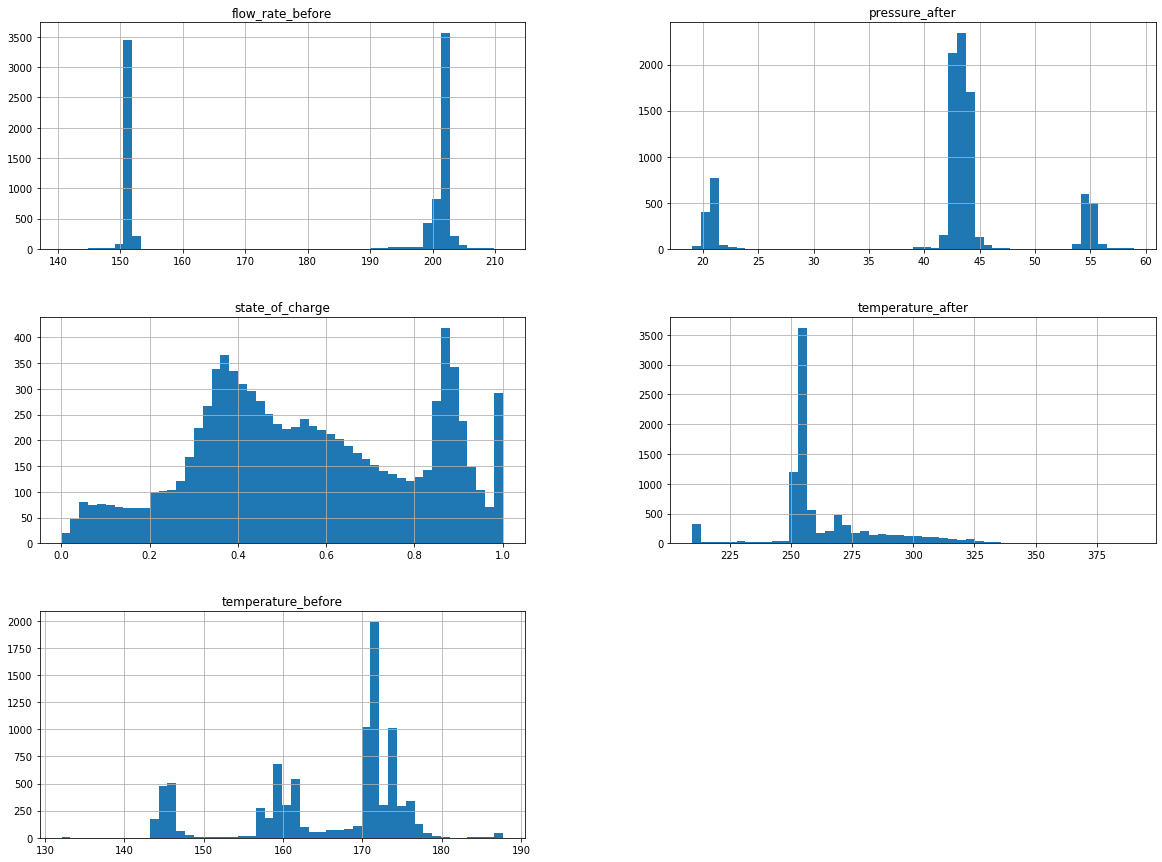

In [61]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

### 3.2 Data performance <a class="anchor" id="III_32"></a>

The diferent features, as well as the label, will be plot to observe their performance in the experiments.

In [62]:
# Define a function to plot a single column from each experiment
def plot_feature(data: pd.DataFrame, feature: str, color: str):
    if data.columns.isin([feature]).any():
        # Set canvas
        columns_of_plots = 2
        total_experiments = dataset.index.unique(level=1).size
        _, axes = plt.subplots(nrows=int(np.ceil(total_experiments/columns_of_plots)), ncols=columns_of_plots, figsize=(21,7))
        plt.subplots_adjust(hspace=1.2)
        row, column = 0, 0
        for serie in data.index.get_level_values(0).unique():
            for experiment in data.loc[serie].index.get_level_values(0).unique():
                data.loc[serie, experiment].plot(ax=axes[row,column], y=feature, color=color).set_title('Experiment ' + experiment)
                if column == columns_of_plots-1:
                    row, column = row + 1, 0
                else:
                    column = column +1

#### 3.2.1 Inlet temperature of the preheated water (= temperature_before)

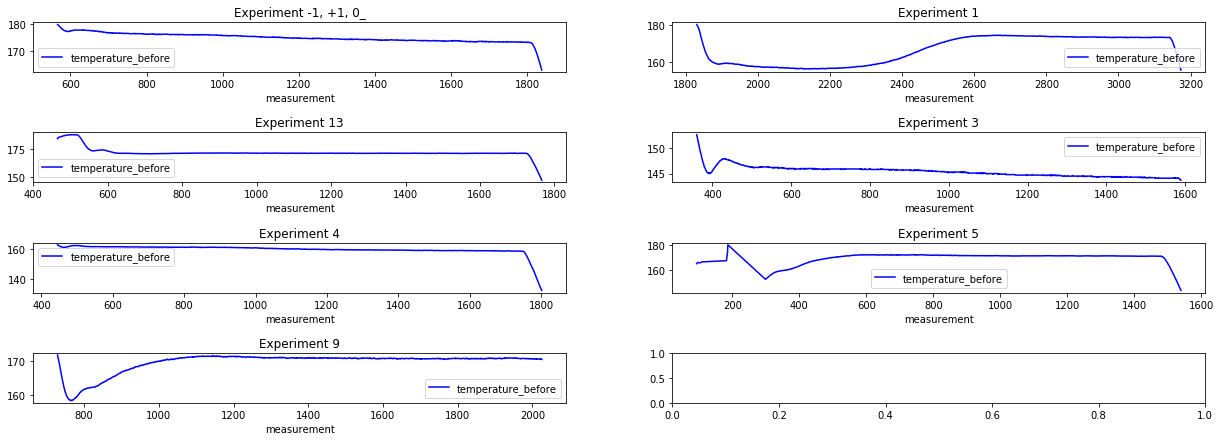

In [63]:
plot_feature(dataset, 'temperature_before', 'blue')

#### 3.2.2 Flow rate of the preheated water (= flow_rate_before)

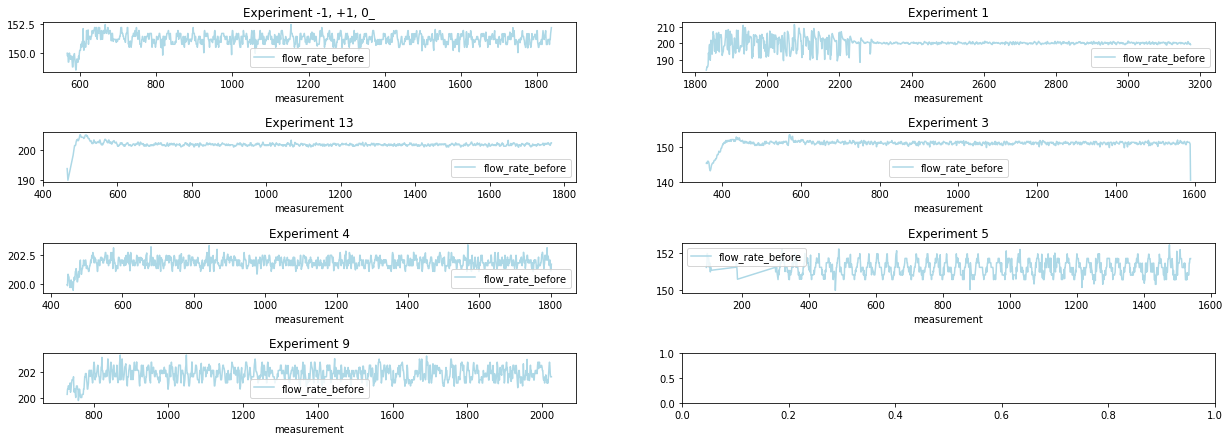

In [64]:
plot_feature(dataset, 'flow_rate_before', 'lightblue')

#### 3.2.3 Outlet pressure of the producted steam (= pressure_after)

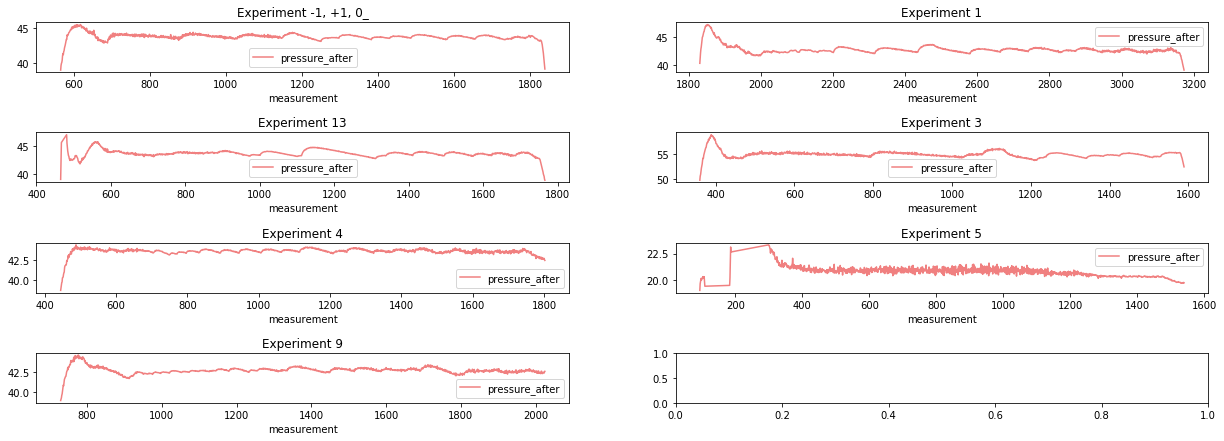

In [65]:
plot_feature(dataset, 'pressure_after', 'lightcoral')

#### 3.2.4 State of charge of the thermal energy storage (`state_of_charge`)

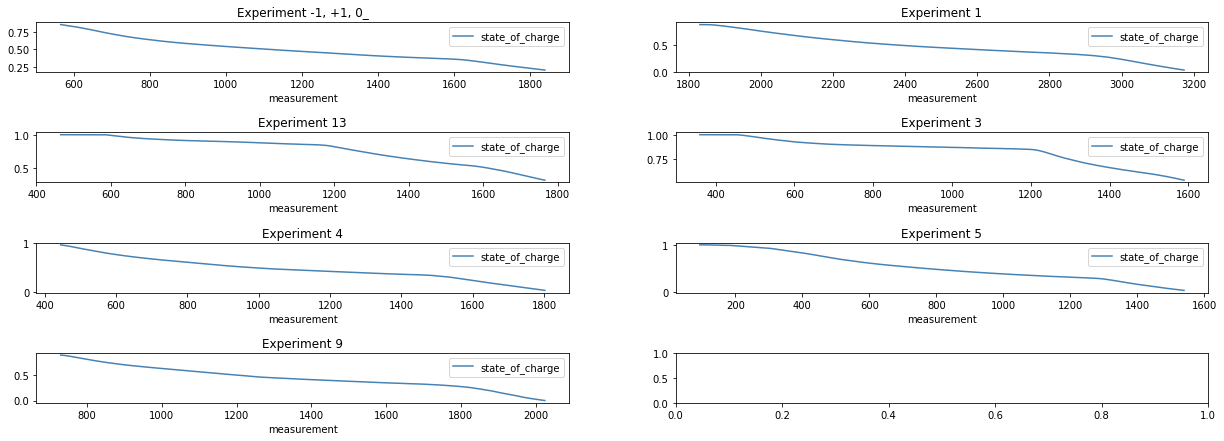

In [66]:
plot_feature(dataset, 'state_of_charge', 'steelblue')

#### 3.2.5 Outlet temperature of the produced steam (`temperature_after`)

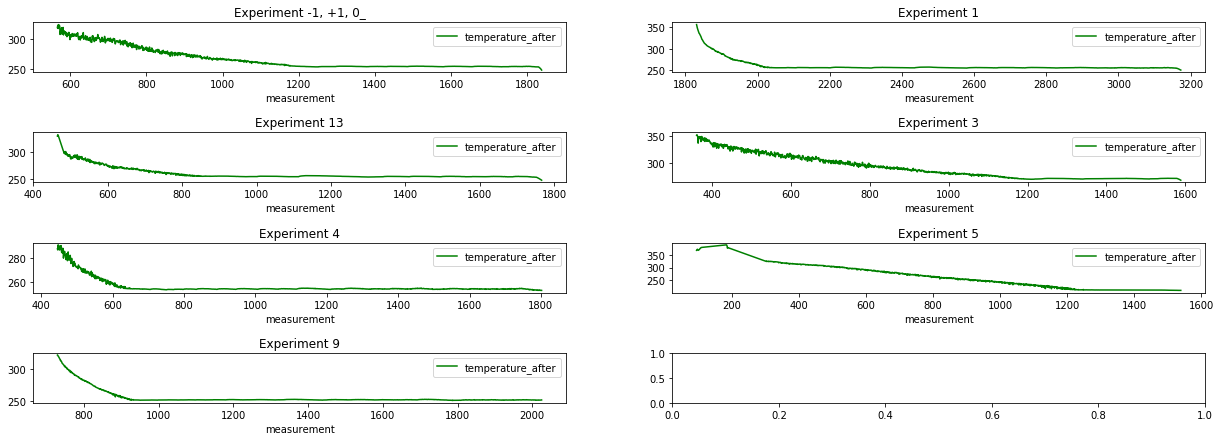

In [67]:
plot_feature(dataset, 'temperature_after', 'green')

### 3.3 Correlation between features and label <a class="anchor" id="III_33"></a>

In [68]:
dataset_with_leveled_features = dataset.copy()

In [69]:
if 'temperature_level' not in dataset.columns:
    # Inserting a temperature_level to categorize for visualization
    dataset_temperature_level = pd.cut(
        x = dataset_with_leveled_features['temperature_before'],
        bins = [140, 160, 170, 190],
        labels = ['150', '165', '180']
    )
    dataset_with_leveled_features.insert(1,'temperature_level', dataset_temperature_level)

if 'flow_rate_level' not in dataset.columns:
    # Inserting a flow_rate_level to categorize for visualization
    dataset_flow_rate_level = pd.cut(
        x = dataset_with_leveled_features['flow_rate_before'],
        bins = [140, 170, 220],
        labels = ['150', '200']
    )
    dataset_with_leveled_features.insert(3,'flow_rate_level', dataset_flow_rate_level)

if 'pressure_level' not in dataset.columns:
    # Inserting a pressure_level to categorize for visualization
    dataset_pressure_level = pd.cut(
        x = dataset_with_leveled_features['pressure_after'],
        bins = [20, 35, 50, 60],
        labels = ['21', '43', '55']
    )
    dataset_with_leveled_features.insert(5,'pressure_level', dataset_pressure_level)

In [70]:
dataset_with_leveled_features.head()

temperature_before temperature_level  \
serie experiment measurement                                         
doe   -1, +1, 0_ 566                       179.7               180   
                 567                       179.6               180   
                 568                       179.5               180   
                 569                       179.3               180   
                 570                       179.2               180   

                              flow_rate_before flow_rate_level  \
serie experiment measurement                                     
doe   -1, +1, 0_ 566                    150.01             150   
                 567                    149.78             150   
                 568                    150.01             150   
                 569                    149.28             150   
                 570                    149.28             150   

                              pressure_after pressure_level  state_of_charge  \
serie experiment measurement                                                   
doe   -1, +1, 0_ 566                   39.01             43         0.854667   
                 567                   39.66             43         0.854000   
                 568                   39.96             43         0.852667   
                 569                   40.12             43         0.852000   
                 570                   40.41             43         0.851333   

                              temperature_after  
serie experiment measurement                     
doe   -1, +1, 0_ 566                      319.2  
                 567                      322.9  
                 568                      317.5  
                 569                      324.2  
                 570                      321.0

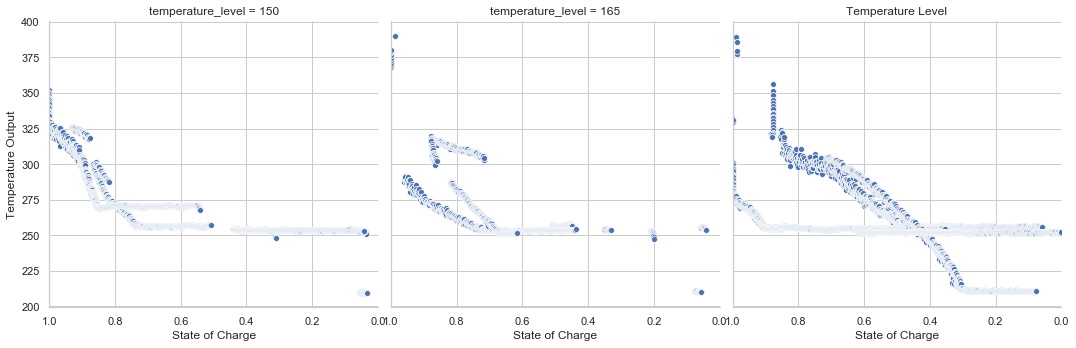

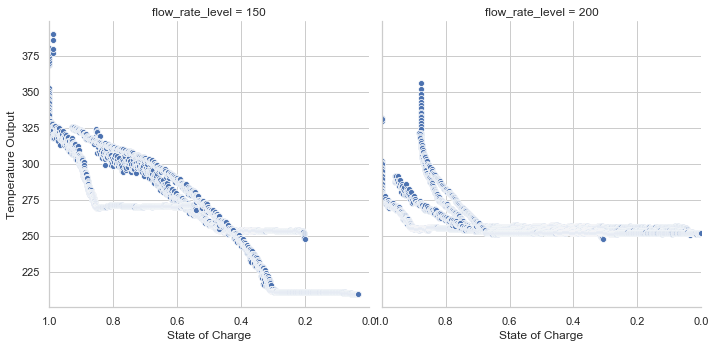

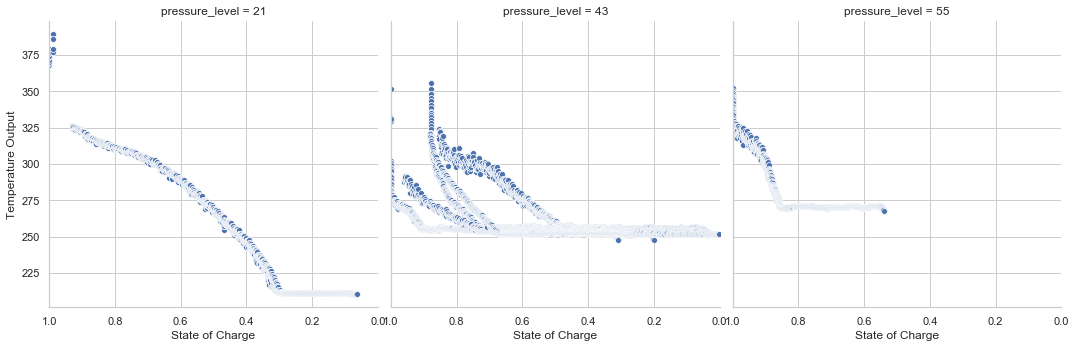

In [71]:
sns.set(style = 'whitegrid')
g = sns.relplot(
    x = 'state_of_charge', 
    y = 'temperature_after',
    col = 'temperature_level',
    kind = 'scatter',
    data = dataset_with_leveled_features
)
g.set_axis_labels('State of Charge', 'Temperature Output').set(xlim=(1,0))
plt.title('Temperature Level')
h = sns.relplot(
    x = 'state_of_charge', 
    y = 'temperature_after',
    col = 'flow_rate_level',
    kind = 'scatter',
    data = dataset_with_leveled_features
)
h.set_axis_labels('State of Charge', 'Temperature Output').set(xlim=(1,0))
i = sns.relplot(
    x = 'state_of_charge', 
    y = 'temperature_after',
    col = 'pressure_level',
    kind = 'scatter',
    data = dataset_with_leveled_features
)
i.set_axis_labels('State of Charge', 'Temperature Output').set(xlim=(1,0))

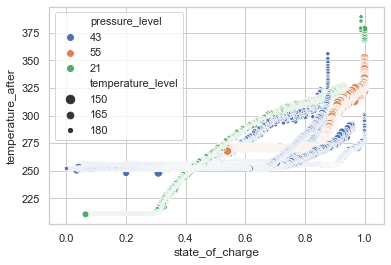

In [72]:
ax = sns.scatterplot(
    x = dataset_with_leveled_features.state_of_charge, 
    y = dataset_with_leveled_features.temperature_after,
    hue = dataset_with_leveled_features.pressure_level, 
    size = dataset_with_leveled_features.temperature_level
)

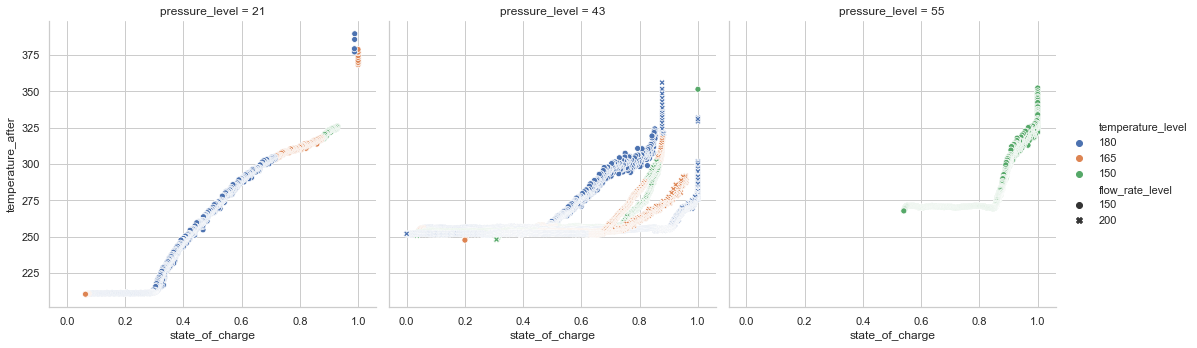

In [73]:
g = sns.relplot(
    x = 'state_of_charge', 
    y = 'temperature_after',
    col = 'pressure_level', 
    hue = 'temperature_level', 
    style = 'flow_rate_level',
    kind = 'scatter', 
    data = dataset_with_leveled_features
)

In [74]:
# Calculate correlation between label and features
correlation = dataset.corr()
correlation['temperature_after'].sort_values(ascending = False)

temperature_after     1.000000
state_of_charge       0.683353
pressure_after        0.305951
flow_rate_before     -0.284156
temperature_before   -0.335567
Name: temperature_after, dtype: float64

## 4. Machine Learning <a class="anchor" id="III_4"></a>
The target is to predict the outlet temperature of the produced steam (corresponding to `temperature_after`).<br>
This is a typical supervised learning task and we will use regression models and if necessary perform ensemble learning.

### 4.1 Creating a train and test set  <a class="anchor" id="III_41"></a>

In [75]:
dataset.head()

temperature_before  flow_rate_before  \
serie experiment measurement                                         
doe   -1, +1, 0_ 566                       179.7            150.01   
                 567                       179.6            149.78   
                 568                       179.5            150.01   
                 569                       179.3            149.28   
                 570                       179.2            149.28   

                              pressure_after  state_of_charge  \
serie experiment measurement                                    
doe   -1, +1, 0_ 566                   39.01         0.854667   
                 567                   39.66         0.854000   
                 568                   39.96         0.852667   
                 569                   40.12         0.852000   
                 570                   40.41         0.851333   

                              temperature_after  
serie experiment measurement                     
doe   -1, +1, 0_ 566                      319.2  
                 567                      322.9  
                 568                      317.5  
                 569                      324.2  
                 570                      321.0

In [76]:
dataset['state_of_charge_cat'] = np.ceil(dataset['state_of_charge']/0.02)

In [77]:
dataset.head()

temperature_before  flow_rate_before  \
serie experiment measurement                                         
doe   -1, +1, 0_ 566                       179.7            150.01   
                 567                       179.6            149.78   
                 568                       179.5            150.01   
                 569                       179.3            149.28   
                 570                       179.2            149.28   

                              pressure_after  state_of_charge  \
serie experiment measurement                                    
doe   -1, +1, 0_ 566                   39.01         0.854667   
                 567                   39.66         0.854000   
                 568                   39.96         0.852667   
                 569                   40.12         0.852000   
                 570                   40.41         0.851333   

                              temperature_after  state_of_charge_cat  
serie experiment measurement                                          
doe   -1, +1, 0_ 566                      319.2                 43.0  
                 567                      322.9                 43.0  
                 568                      317.5                 43.0  
                 569                      324.2                 43.0  
                 570                      321.0                 43.0

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
strat_train_set, strat_test_set = train_test_split(
    dataset,
    test_size = 0.2,
    random_state = 42,
    stratify = dataset['state_of_charge_cat']
)

In [80]:
dataset['state_of_charge_cat'].value_counts()/len(dataset)

44.0    0.046730
19.0    0.040654
45.0    0.037892
18.0    0.037119
20.0    0.036898
21.0    0.034247
22.0    0.032700
50.0    0.032258
23.0    0.030490
43.0    0.030159
17.0    0.029717
24.0    0.027729
46.0    0.026182
28.0    0.026182
29.0    0.025630
25.0    0.025519
27.0    0.024967
26.0    0.024635
16.0    0.024525
30.0    0.024304
31.0    0.023420
32.0    0.022316
33.0    0.020879
34.0    0.019443
15.0    0.018891
35.0    0.018007
36.0    0.016792
47.0    0.016460
42.0    0.015687
37.0    0.015577
38.0    0.014803
41.0    0.014141
39.0    0.014030
40.0    0.013367
14.0    0.013036
48.0    0.011489
13.0    0.011489
12.0    0.011268
11.0    0.011047
3.0     0.008948
5.0     0.008396
6.0     0.008175
4.0     0.008175
8.0     0.007733
49.0    0.007733
9.0     0.007623
10.0    0.007512
7.0     0.007512
2.0     0.005303
1.0     0.002209
Name: state_of_charge_cat, dtype: float64

In [81]:
strat_train_set

temperature_before  flow_rate_before  \
serie experiment measurement                                         
doe   9          1742                      170.6            201.91   
      5          907                       171.7            151.48   
                 598                       172.3            151.07   
      1          3172                      156.6            199.57   
      5          870                       171.7            151.72   
...                                          ...               ...   
      9          1376                      170.9            201.91   
      4          633                       161.6            201.85   
      9          1445                      170.9            203.10   
      4          1007                      160.7            202.10   
      -1, +1, 0_ 1588                      173.7            151.17   

                              pressure_after  state_of_charge  \
serie experiment measurement                                    
doe   9          1742                  42.94         0.301333   
      5          907                   20.81         0.423000   
                 598                   20.58         0.613000   
      1          3172                  39.37         0.036333   
      5          870                   20.82         0.441333   
...                                      ...              ...   
      9          1376                  43.01         0.413000   
      4          633                   43.72         0.727667   
      9          1445                  42.39         0.390667   
      4          1007                  43.44         0.482333   
      -1, +1, 0_ 1588                  43.77         0.360000   

                              temperature_after  state_of_charge_cat  
serie experiment measurement                                          
doe   9          1742                     252.5                 16.0  
      5          907                      249.7                 22.0  
                 598                      292.5                 31.0  
      1          3172                     251.3                  2.0  
      5          870                      256.3                 23.0  
...                                         ...                  ...  
      9          1376                     252.7                 21.0  
      4          633                      255.7                 37.0  
      9          1445                     251.8                 20.0  
      4          1007                     253.4                 25.0  
      -1, +1, 0_ 1588                     253.7                 19.0  

[7241 rows x 6 columns]

In [82]:
for set in (strat_train_set, strat_test_set):
    if set.columns.isin(['state_of_charge_cat']).any():
        set = set.drop(['state_of_charge_cat'], axis = 1)

In [83]:
print(len(strat_train_set), "train +", len(strat_test_set), "test")

7241 train + 1811 test


In [84]:
strat_train_set

temperature_before  flow_rate_before  \
serie experiment measurement                                         
doe   9          1742                      170.6            201.91   
      5          907                       171.7            151.48   
                 598                       172.3            151.07   
      1          3172                      156.6            199.57   
      5          870                       171.7            151.72   
...                                          ...               ...   
      9          1376                      170.9            201.91   
      4          633                       161.6            201.85   
      9          1445                      170.9            203.10   
      4          1007                      160.7            202.10   
      -1, +1, 0_ 1588                      173.7            151.17   

                              pressure_after  state_of_charge  \
serie experiment measurement                                    
doe   9          1742                  42.94         0.301333   
      5          907                   20.81         0.423000   
                 598                   20.58         0.613000   
      1          3172                  39.37         0.036333   
      5          870                   20.82         0.441333   
...                                      ...              ...   
      9          1376                  43.01         0.413000   
      4          633                   43.72         0.727667   
      9          1445                  42.39         0.390667   
      4          1007                  43.44         0.482333   
      -1, +1, 0_ 1588                  43.77         0.360000   

                              temperature_after  state_of_charge_cat  
serie experiment measurement                                          
doe   9          1742                     252.5                 16.0  
      5          907                      249.7                 22.0  
                 598                      292.5                 31.0  
      1          3172                     251.3                  2.0  
      5          870                      256.3                 23.0  
...                                         ...                  ...  
      9          1376                     252.7                 21.0  
      4          633                      255.7                 37.0  
      9          1445                     251.8                 20.0  
      4          1007                     253.4                 25.0  
      -1, +1, 0_ 1588                     253.7                 19.0  

[7241 rows x 6 columns]

In [85]:
# Features
x_train = strat_train_set.drop('temperature_after', axis=1)
# Label
y_train = strat_train_set.temperature_after

### 4.2 Setting performance measures<a class="anchor" id="III_42"></a>

#### 4.2.1 Mean absolute error (MAE):

\begin{equation*} 
MAE\ (\mathbf{X}, \hat{y}) = \frac{1}{N}\ \sum_{i=1}^N \left| \hat{y}(x^{(i)}) - y^{(i)}\right|
\end{equation*}

In [86]:
from sklearn.metrics import mean_absolute_error

#### 4.2.2 Root-mean-square error (RMSE):

\begin{equation*} RMSE\ (\mathbf{X}, \hat{y}) = \sqrt{\frac{1}{N}\ \sum_{i=1}^N \left(
\hat{y}(x^{(i)}) - y^{(i)}\right)^2} \end{equation*}

In [87]:
from sklearn.metrics import mean_squared_error

Another performance measure could also be the execution time. This will be taken into account at the conclusion of this project.

### 4.3 Training machine learning models <a class="anchor" id="III_43"></a>

> We will train different models and comment the results at the end before we start the estimation on the test set.

The models will be:

4.3.1. [Linear Models](#431)<br>
4.3.2. [Decision Tree](#432)<br>
4.3.3. [Random Forest](#433)<br>
4.3.4. [Randomized Search](#435)<br>
4.3.5. [Extremely Randomized Trees](#436)<br>
4.3.6. [Stacked Generalization](#437)<br>

#### 4.3.1 Linear Models<a class="anchor" id="431"></a>

##### - Linear Regression

Importing the model:

In [88]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

Fitting and prediction:

In [89]:
lin_reg.fit(x_train, y_train)
lin_pred = lin_reg.predict(x_train)

Error calculation:

In [90]:
lin_mae = mean_absolute_error(y_train, lin_pred)
lin_rmse = sqrt(mean_squared_error(y_train, lin_pred))

print('The MAE of the linear regression is: {:.4f}'.format(lin_mae))
print('The RMSE of the linear regression is: {:.4f}'.format(lin_rmse))

The MAE of the linear regression is: 12.0312
The RMSE of the linear regression is: 15.8742


#### - Least Angle Regression aka LARS

The algorithm is similar to forward stepwise regression, but instead of including features at each step, the estimated coefficients are increased in a direction equiangular to each one’s correlations with the residual.<br>
Source: https://scikit-learn.org/stable/modules/linear_model.html#lars-lasso

Importing the model:

In [91]:
from sklearn.linear_model import LassoLars

lars_reg = LassoLars(alpha=0.01)

Fitting and prediction:

In [92]:
lars_reg.fit(x_train, y_train)
lars_pred = lars_reg.predict(x_train)

Error calculation:

In [93]:
lars_mae = mean_absolute_error(y_train, lars_pred)
lars_rmse = sqrt(mean_squared_error(y_train, lars_pred))

print('The MAE of the linear regression is: {:.4f}'.format(lars_mae))
print('The RMSE of the linear regression is: {:.4f}'.format(lars_rmse))

The MAE of the linear regression is: 11.8644
The RMSE of the linear regression is: 15.9753


#### 4.3.2 Decision Tree <a class="anchor" id="432"></a>

Importing the model:

In [94]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

Fitting and prediction:

In [95]:
tree_reg.fit(x_train, y_train)
tree_pred = tree_reg.predict(x_train)

Error calculation:

In [96]:
tree_mae = mean_absolute_error(y_train, tree_pred)
tree_rmse = sqrt(mean_squared_error(y_train, tree_pred))

print('The MAE of the tree regression is: {:.4f}'.format(tree_mae))
print('The RMSE of the tree regression is: {:.4f}'.format(tree_rmse))

The MAE of the tree regression is: 0.0001
The RMSE of the tree regression is: 0.0017


#### 4.3.3 Random Forest <a class="anchor" id="433"></a>

Importing the model:

In [97]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state = 42)

Fitting and prediction:

In [98]:
forest_reg.fit(x_train, y_train)
forest_pred = forest_reg.predict(x_train)

Error calculation:

In [99]:
forest_mae = mean_absolute_error(y_train, forest_pred)
forest_rmse = sqrt(mean_squared_error(y_train, forest_pred))

print('The MAE of the forest regression is: {:.4f}'.format(forest_mae))
print('The RMSE of the forest regression is: {:.4f}'.format(forest_rmse))

The MAE of the forest regression is: 0.2204
The RMSE of the forest regression is: 0.6051


#### 4.3.4 Hyperparameter Tuning – Randomized Search <a class="anchor" id="434"></a>

As the name suggests the Randomized Search algorithm tries random combinations of a range of values of given parameters. The numerical parameters can be specified as a range (unlike fixed values in GridSearch). The number of iterations of random searches that shall be performed can be controlled. It is known to find a very good combination in a lot less time compared to GridSearch. However the range for parameters and the number of random search iteration has to be chosen carefully as it can miss the best parameter combination with lesser iterations or smaller ranges. <a href="#[7]">[7]</a>

At this point we will tune the hyperparameters of the random forest regressor, because it performed best on the train set inbetween our first machine learning models.

In [100]:
print('Parameters currently in use:\n')
pprint(forest_reg.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [101]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [102]:
random_search = RandomizedSearchCV(
    estimator = forest_reg,
    param_distributions = random_grid, 
    n_iter = 100, 
    cv = 3, 
    verbose = 2, 
    random_state = 42,
    n_jobs = -1
)

random_search.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [103]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [104]:
random_reg = random_search.best_estimator_

random_reg.fit(x_train, y_train)
random_pred = random_reg.predict(x_train)

random_mae = mean_absolute_error(y_train, random_pred)
random_rmse = sqrt(mean_squared_error(y_train, random_pred))

print('The MAE of the final prediction is: {:.4f}'.format(random_mae))
print('The RMSE of the final prediction is: {:.4f}'.format(random_rmse))

The MAE of the final prediction is: 0.0006
The RMSE of the final prediction is: 0.0033


#### 4.3.5 Extremely Randomized Trees <a class="anchor" id="435"></a>

In extremely randomized trees, randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias.<br>
Source: https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees

Importing the model:

In [105]:
from sklearn.ensemble import ExtraTreesRegressor

extra_reg = ExtraTreesRegressor(random_state = 42)

Fitting and prediction:

In [106]:
extra_reg.fit(x_train, y_train)
extra_pred = extra_reg.predict(x_train)

Error calculation:

In [107]:
extra_mae = mean_absolute_error(y_train, extra_pred)
extra_rmse = sqrt(mean_squared_error(y_train, extra_pred))

print('The MAE of the forest regression is: {:.4f}'.format(extra_mae))
print('The RMSE of the forest regression is: {:.4f}'.format(extra_rmse))

The MAE of the forest regression is: 0.0004
The RMSE of the forest regression is: 0.0064


#### 4.3.6 Stacked generalization aka Stacking <a class="anchor" id="436"></a>

Stacked generalization is a method for combining estimators to reduce their biases [W1992] [HTF]. More precisely, the predictions of each individual estimator are stacked together and used as input to a final estimator to compute the prediction. This final estimator is trained through cross-validation.<br>
Source: https://scikit-learn.org/stable/modules/ensemble.html#stacked-generalization

Combination of the default predictors
- Linear Regressor
- Decision Tree Regressor and 
- Random Forst Regressor

Importing the model:

In [108]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('Linear', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor(random_state=42))
]

stacking_reg = StackingRegressor(estimators = estimators,
    final_estimator = ExtraTreesRegressor(n_estimators = 10, random_state = 42))

Fitting and prediction:

In [109]:
stacking_reg.fit(x_train, y_train)
stacking_pred = stacking_reg.predict(x_train)

Error calculation and printing:

In [110]:
stacking_mae = mean_absolute_error(y_train, stacking_pred)
stacking_rmse = sqrt(mean_squared_error(y_train, stacking_pred))

print('The MAE of the forest regression is: {:.4f}'.format(stacking_mae))
print('The RMSE of the forest regression is: {:.4f}'.format(stacking_rmse))

The MAE of the forest regression is: 0.3913
The RMSE of the forest regression is: 0.9257


#### 4.3.7 Conclusion on the train set <a class="anchor" id="437"></a>

Using cross-validation as an alternative performance measure on all our trained machine learning models.

In [111]:
from sklearn.model_selection import cross_val_score

# Linear Regression
scores = cross_val_score(lin_reg, x_train, y_train,
scoring = 'neg_mean_squared_error', cv = 10)
lin_rmse_scores = np.sqrt(-scores)

# LARS
scores = cross_val_score(lars_reg, x_train, y_train,
scoring = 'neg_mean_squared_error', cv = 10)
lars_rmse_scores = np.sqrt(-scores)

# Decision Tree
scores = cross_val_score(tree_reg, x_train, y_train,
scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)

# Random Forest
scores = cross_val_score(forest_reg, x_train, y_train,
scoring = 'neg_mean_squared_error', cv = 10)
forest_rmse_scores = np.sqrt(-scores)

# Randomized Search
scores = cross_val_score(random_reg, x_train, y_train,
scoring = 'neg_mean_squared_error', cv = 10)
random_rmse_scores = np.sqrt(-scores)

# Extremely Randomized Trees
scores = cross_val_score(extra_reg, x_train, y_train,
scoring = 'neg_mean_squared_error', cv = 10)
extra_rmse_scores = np.sqrt(-scores)

# Stacking
scores = cross_val_score(stacking_reg, x_train, y_train,
scoring = 'neg_mean_squared_error', cv = 10)
stacking_rmse_scores = np.sqrt(-scores)

In [112]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [113]:
display_scores(lin_rmse_scores)

Scores: [15.81602774 15.576402   15.43664425 17.20318285 16.64173505 15.3420582
 16.30048832 15.74137612 15.66649786 15.03809348]
Mean: 15.876250586830745
Standard deviation: 0.6215737474886422


In [114]:
display_scores(lars_rmse_scores)

Scores: [15.88693478 15.61609132 15.47818291 17.33744784 16.77640989 15.49166538
 16.31585858 15.87708919 15.69021853 15.2339966 ]
Mean: 15.970389501010056
Standard deviation: 0.6221959076796137


In [115]:
display_scores(tree_rmse_scores)

Scores: [1.73624347 1.73094599 2.16057043 1.74783262 1.67102997 1.54335369
 1.91140464 2.13224209 1.90148128 3.05513829]
Mean: 1.9590242464418044
Standard deviation: 0.4098348073823942


In [116]:
display_scores(forest_rmse_scores)

Scores: [1.27758404 1.45313064 1.23640632 1.52639881 1.42625082 1.19602578
 1.72877966 1.62823638 1.29270499 2.52116903]
Mean: 1.52866864774161
Standard deviation: 0.36959526259989334


In [117]:
display_scores(random_rmse_scores)

Scores: [1.3886649  1.31564301 1.26258912 1.50387706 1.47240572 1.65725937
 1.50623273 1.2493624  1.31822715 1.6988948 ]
Mean: 1.4373156282153896
Standard deviation: 0.14980626685685006


In [118]:
display_scores(extra_rmse_scores)

Scores: [1.25457604 1.14847489 1.08277325 1.43951314 1.14761676 1.30003789
 1.32104294 1.11607302 1.27185895 1.77524276]
Mean: 1.2857209632724855
Standard deviation: 0.19333283615624583


In [119]:
display_scores(stacking_rmse_scores)

Scores: [2.04720595 1.74324711 1.45648977 1.69338488 1.53244841 1.35324136
 1.93969011 1.60673283 1.41456031 2.86958338]
Mean: 1.765658409491128
Standard deviation: 0.4245608683807144


As can be seen by looking at the displayed scores, the Randomized Search Regressor and the Extremely Randomized Tree Regressor perform the best on the train set. The Randomized Search Regressor even hast the smallest standard deviation on all splits, but if we take the execution time into account, the Extremely Randomized Tree Regressor perfoms the best when talking about execution time and on the mean squared error.<br>
One face is quite interesting. The Decision Tree Regressor and the Extremely Randomized Tree Regressor seem to overfit on the whole training set, which means that they have a very low bias. But on the cross-validation their bias seem to be comparatively normal. 

Here is an overview with all model performances:

In [120]:
results_train = {
    'Linear Regression MAE' : lin_mae,
    'Linear Regression RMSE' : lin_rmse,
    'Least Angle Regression MAE': lars_mae,
    'Least Angle Regression RMSE': lars_rmse,
    'Decision Tree Regression MAE' : tree_mae,
    'Decision Tree Regression RMSE' : tree_rmse,
    'Random Forest Regression MAE' : forest_mae,
    'Random Forest Regression RMSE' : forest_rmse,
    'Randomized Search MAE' : random_mae,
    'Randomized Search RMSE' : random_rmse,
    'Extremely Randomized Trees MAE' : extra_mae,
    'Extremely Randomized Trees RMSE' : extra_rmse,
    'Stacked Generalization MAE' : stacking_mae,
    'Stacked Generalization RMSE' : stacking_rmse,
    'Cross Validation Linear' : min(lin_rmse_scores),
    'Cross Validation LARS' : min(lars_rmse_scores),
    'Cross Validation Tree' : min(tree_rmse_scores),
    'Cross Validation Forest' : min(forest_rmse_scores),
    'Cross Validation Random' : min(random_rmse_scores),
    'Cross Validation Extra' : min(extra_rmse_scores),
    'Cross Validation Stacking' : min(stacking_rmse_scores),
}

results_train

{'Linear Regression MAE': 12.031225934901265,
 'Linear Regression RMSE': 15.87423401661213,
 'Least Angle Regression MAE': 11.864359714838344,
 'Least Angle Regression RMSE': 15.975303115951428,
 'Decision Tree Regression MAE': 5.524098882119751e-05,
 'Decision Tree Regression RMSE': 0.0016619414672859793,
 'Random Forest Regression MAE': 0.22039748653501892,
 'Random Forest Regression RMSE': 0.6050737685275657,
 'Randomized Search MAE': 0.0005688884729321806,
 'Randomized Search RMSE': 0.0032644352321206855,
 'Extremely Randomized Trees MAE': 0.0004076784977694475,
 'Extremely Randomized Trees RMSE': 0.006416567468267091,
 'Stacked Generalization MAE': 0.39127215393822484,
 'Stacked Generalization RMSE': 0.925726067791882,
 'Cross Validation Linear': 15.038093479612565,
 'Cross Validation LARS': 15.233996601905798,
 'Cross Validation Tree': 1.543353688476755,
 'Cross Validation Forest': 1.196025777149943,
 'Cross Validation Random': 1.2493624011450437,
 'Cross Validation Extra': 1.082

### 4.4 Final evaluation on the test set <a class="anchor" id="III_44"></a>

Because of this project being part of a education course, not just one final model will be tested, but the performance measures of every trained model on the test set will be estimated. Additionally, an accuracy measure is introduced in the following function as well as the time needed

In [121]:
def evaluate(model, test_features, test_labels):
    '''
    Defining a function which calcutlates the performance measures mean absolute error, root mean squared error and
    an accuracy on the mean absolute error'''
    predictions = model.predict(test_features)
    MAE = mean_absolute_error(test_labels, predictions)
    RMSE = sqrt(mean_squared_error(test_labels, predictions))
    mape = 100 * np.mean(MAE / test_labels)
    accuracy = 100 - mape
    print('Model Performance:')
    print('MAE: {:0.4f} degrees.'.format(MAE))
    print('RMSE: {:0.4f} degrees.'.format(RMSE))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

Setting the test labels and features:

In [122]:
x_test = strat_test_set.drop('temperature_after', axis = 1)
y_test = strat_test_set.temperature_after

Calculating all model performances (including MAE, RMSE and accuracy):

In [123]:
linear_accuracy = evaluate(lin_reg, x_test, y_test)

Model Performance:
MAE: 11.8577 degrees.
RMSE: 15.3609 degrees.
Accuracy = 95.46%.


In [124]:
lars_accuracy = evaluate(lars_reg, x_test, y_test)

Model Performance:
MAE: 11.7412 degrees.
RMSE: 15.5213 degrees.
Accuracy = 95.51%.


In [125]:
tree_accuracy = evaluate(tree_reg, x_test, y_test)

Model Performance:
MAE: 0.6740 degrees.
RMSE: 1.7182 degrees.
Accuracy = 99.74%.


In [126]:
forest_accuracy = evaluate(forest_reg, x_test, y_test)

Model Performance:
MAE: 0.5499 degrees.
RMSE: 1.3440 degrees.
Accuracy = 99.79%.


In [127]:
random_accuracy = evaluate(random_search.best_estimator_, x_test, y_test)

Model Performance:
MAE: 0.5630 degrees.
RMSE: 1.3441 degrees.
Accuracy = 99.78%.


In [128]:
extra_accuracy = evaluate(extra_reg, x_test, y_test)

Model Performance:
MAE: 0.5272 degrees.
RMSE: 1.2467 degrees.
Accuracy = 99.80%.


In [129]:
stacking_accuracy = evaluate(stacking_reg, x_test, y_test)

Model Performance:
MAE: 0.6407 degrees.
RMSE: 1.4863 degrees.
Accuracy = 99.75%.


### 4.5 Conclusion<a class="anchor" id="III_45"></a>

With regards on the following performance measures:

- mean absolute error
- root mean squared error
- accuracy &
- execution time

the best performance has the Extremely Randomized Trees Regressor.

Especially the execution time compared to the Randomized Search is by far smaller. Whereas the Randomized Search with the given arguments takes a considerable time, the model fitting and prediction of the Extremely Randomized Trees Regressor only takes a small fraction of it.

The execution time of the final model is:

In [130]:
final_model = ExtraTreesRegressor(random_state = 42)

%timeit final_model.fit(x_train, y_train)
%timeit final_pred = final_model.predict(x_train)

698 ms ± 10.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
97.3 ms ± 1.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [131]:
%timeit final_model.fit(x_test, y_test)
%timeit final_pred = final_model.predict(x_test)

216 ms ± 5.36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
23 ms ± 689 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


And the final model performance is:

In [132]:
final_accuracy = evaluate(extra_reg, x_test, y_test)

Model Performance:
MAE: 0.5272 degrees.
RMSE: 1.2467 degrees.
Accuracy = 99.80%.


## References

[<a id="[1]">1</a>] **`[VIDEO]`** [A year in the life of Earth's CO<sub>2</sub>](https://www.youtube.com/watch?v=x1SgmFa0r04)<br>
[<a id="[2]">2</a>] **`[STATEMENT]`** [BEE-Prognose – *Entwicklung des Anteils Erneuerbarer Energien am Brutto-Endenergieverbrauch bis 2020*](https://www.bee-ev.de/fileadmin/Publikationen/BEE-Prognose_2020/BEE-Prognose_Entwicklung_Anteil_Erneuerbarer_Energien_bis_2020.pdf)<br>
[<a id="[3]">3</a>] **`[DATA BANK]`** [Energiedaten: Gesamtausgabe](https://www.bmwi.de/Redaktion/DE/Artikel/Energie/energiedaten-gesamtausgabe.html)<br>
[<a id="[4]">4</a>] **`[REPORT]`** [Strategische Optionen zur Dekarbonisierung und effizienteren Nutzung der Prozesswärme und -kälte](https://www.hamburg-institut.com/images/pdf/studien/180405-BEE-Prozesswrme_fin.pdf)<br>
[<a id="[5]">5</a>] **`[PAGE]`** [The Team Data Science Process Lifecycle](https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/lifecycle)<br>
[<a id="[6]">6</a>] **`[BOOK]`** [Machine Learning project checklist](https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/)<br>
[<a id="[7]">7</a>] **`[BOOK]`** [Mastering Machine Learning with Python in Six Steps](https://www.springer.com/de/book/9781484228661#otherversion=9781484228654)